# Final Project

MIDS W281: Computer Vision

![Teaser](https://raw.githubusercontent.com/W281/fileRepository/main/Assignments/final_project/teaser.png)

### Overview

This project will consist of a large dataset including images from 20 different categories. Your task is to identify key distinguishing features of these images and develop models to classify them in Python. To successfully train a classifier we need to do data cleaning, feature exploration, model parameter selection, and model selection. In this project, you will do all of these steps. You will extract different image features, visualize those features, train several models, and explain the process in a report. Most of the concepts, like feature extraction and visualization, are already taught in the class. The classification techniques will be covered soon. We recommend that you start working on the project as early as possible.

# Instructions

1. **Feature Extraction**: The first step for a classification task is identifying discriminative features. For this, you can use simple features like image intensity or you can extract more sophisticated features like the convolutional neural network (CNN) based features. Additionally, you can use either a single channel or all three color channels for feature computation (image color can sometimes provide an additional cue for classification). Write separate Python functions to extract each of the following image features given an RGB image as input:

    a. Histogram of Oriented Gradients (HOG): This is the feature you learned in the class. You can use Python's sklearn library for extracting this feature. In your report, include plot(s) visualizing the HOG features for an image and explain how you decided the size of the window for HOG computation.
    
    b. Harris Corner Features: As you learned during motion estimation, image corners are robust features for tracking. One way to detect corners is by using an algorithm by Chris Harris & Mike Stephens, Harris corner detector (suggested [reading](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html#harris-corners)). Again, you can use Python's sklearn or OpenCV implementation of Harris Corner detection algorithms. In your report, include plot(s) visualizing these features for an image and explain how you selected different parameters for the detector.
    
    c. Two features of your choice: Implement two additional features of your choice which can help in the classification task. These features can be as simple as image intensity or state-of-the-art image classification features extracted using a CNN pre-trained on ImageNet. In your report, include plot(s) in order to explain the features you implemented and why you selected these features.

2. **Feature Visualization**: Load the images provided in the `20_categories_training` directory. The images are divided into 20 categoreis. Visualize the above features for these images on 2-D plots. As these features are high dimensional, you will need to reduce the dimensionality of these features. Remember PCA and t-SNE for dimensionality reduction. You can use any of these dimensionality reduction techniques for visualizing the features on a 2-D plot. You can use only a small set of images from each of the 20 categories. Use Python's sklearn library for t-SNE or PCA. In the 2-D plot, use different colors to represent images from different categories. In your report, include plot(s) to show the visualization of the features (you can also use combination of multiple features) on 2-D plot. Explain which features and dimensionality reduction technique you used for the plots and why. Also, explain if there is anything interesting you observed while exploring the features.   

3. **Image Classification**: Split the images from each category into training and validation dataset. Generally, it is done by randomly selecting 80% images from each class for training and 20% for validation. You will train the models using training data, tune the hyper-parameters for the classifiers using validation dataset. You will train multiple classification models here. For each classification model, you can use sklearn library functions. Use the following classification techniques that you learned in the class using the features you implemented above: Logistic Regression, nearest-neighbor clustering, SVM, and CNN (optional). Use the validation set to compute the accuracy throughout the process, with and without different features, optimizing as much as possible. Use tricks like cross-validation and hyper-parameter tuning to ensure your model is generalizing to validation dataset.   

4. Run the model of your choice (that gives the best accuracy on the validation data) on the test data provided in `20_categories_test` directory. Generate a csv of classification results for all the images. The csv will have two columns: name and label that specify the image name and the output class label. Include this csv in your submission.

### 3 Deliverables:

You will submit your code, classification results on test data, and a report. In the report (maximum three pages), you will explain the process and things you learned in the project. You will be graded on the correctness of the code, clarity of your report, and your model accuracy on the test data.

# Imports

In [215]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [216]:
# Source: https://www.tensorflow.org/tutorials/images/classification
# Source: https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import os
import PIL
from PIL import Image
import tensorflow as tf
import pathlib
import imghdr
from pathlib import Path
import shutil, os
from os import listdir
import cv2
from skimage.color import gray2rgb
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from skimage.filters import sobel
from skimage.feature import hog
from scipy.stats import stats
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import data, color, exposure
from torchvision import transforms
from torchvision.utils import save_image
from torchvision.io import read_image
import cv2 as cv
from glob import glob
import torch
from torch import nn
from torchsummary import summary
import torchvision.models as models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.utils.fixes import loguniform
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [217]:
!pwd

/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains


In [218]:
# Source: https://superuser.com/questions/895276/how-to-recursively-delete-all-ds-store-files-from-a-directory-on-a-windows-mach
# Remove DS Store file
%cd /content/gdrive/MyDrive/W281/final-project-LifeGains/20_categories_training
!find . -type f \( -name ".DS_Store" -o -name "._.DS_Store" \) -print0 | xargs -0 rm

/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/20_categories_training
rm: missing operand
Try 'rm --help' for more information.


In [219]:
%cd /content/gdrive/MyDrive/W281/final-project-LifeGains
!pwd

/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains


In [220]:
# Check GPU usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model.to(device)

print(device)

cuda


In [221]:
def get_PCA(X_list, n_components=2):
  pca_list = []
  xpca_list = []
  for X in X_list:
    pca = PCA(n_components=n_components, svd_solver="randomized").fit(X)
    X_pca = pca.transform(X)
    pca_list.append(pca)
    xpca_list.append(X_pca)
  return pca_list, xpca_list

def plot_PCA(X_list, n_components=2):
  pca_list, xpca_list = get_PCA(X_list, n_components=n_components)

  plt.figure(figsize=(15,5))
  colors = ['b-', 'm-', 'g-', 'k-', 'o-']
  labels = ['pixel_features', 'hog_features', 'harris_features', 'sobel_features', 'resnet101_features']
  for i in range(len(X_list)):
    plt.plot(np.cumsum(pca_list[i].explained_variance_ratio_), colors[i], label=labels[i])
  plt.xticks(np.arange(n_components)+1)
  plt.yticks(np.linspace(0, 1, 8))
  plt.grid(b=True)
  plt.xlabel('Number of components')
  plt.ylabel('Explained Variances')
  plt.legend()
  plt.show()

def get_tsne(X_list, n_components=2):
  xtsne_list = []
  for X in X_list:
    # Shruti OH: Always run TSNE with random state=fixed so that you get the same output everytime.
    tsne = TSNE(n_components=n_components, random_state=0)
    X_tsne = tsne.fit_transform(X)
    xtsne_list.append(X_tsne)
  return xtsne_list


# EDA
- The default resizing param's default is nearest neighbors and that will give you aliasing.

- Bilinear (weighted average of nearest neighbors) will give you less aliasing.

In [222]:
# Source: https://stackoverflow.com/questions/973473/getting-a-list-of-all-subdirectories-in-the-current-directory
train_classes = sorted([ f.name for f in os.scandir("/content/gdrive/MyDrive/W281/final-project-LifeGains/20_categories_training") if f.is_dir() ])
print(train_classes)
print(len(train_classes))

['airplanes', 'bear', 'blimp', 'comet', 'crab', 'dog', 'dolphin', 'giraffe', 'goat', 'gorilla', 'kangaroo', 'killer-whale', 'leopards', 'llama', 'penguin', 'porcupine', 'teddy-bear', 'triceratops', 'unicorn', 'zebra']
20


In [223]:
# Create dictionary of enumerate "string" : 0
# Source: https://realpython.com/python-enumerate/
train_classes_dict = {}
for count, string in enumerate(train_classes):
  train_classes_dict[string] = count

print(train_classes_dict)

{'airplanes': 0, 'bear': 1, 'blimp': 2, 'comet': 3, 'crab': 4, 'dog': 5, 'dolphin': 6, 'giraffe': 7, 'goat': 8, 'gorilla': 9, 'kangaroo': 10, 'killer-whale': 11, 'leopards': 12, 'llama': 13, 'penguin': 14, 'porcupine': 15, 'teddy-bear': 16, 'triceratops': 17, 'unicorn': 18, 'zebra': 19}


In [224]:
# Create y classes for Feature Visualization
target_y = []
input_path = Path.cwd() / "20_categories_training"
for i in sorted(input_path.glob('*/[!.]*.jpg')):
  # Append class name (aka target name), but numerical, into the target_y_list
  target_y.append(train_classes_dict[os.path.split(os.path.split(i)[0])[1]])
print(len(target_y))

1501


In [225]:
# Desired End Image Size
# Source: https://www.ibm.com/docs/SSRU69_1.1.3/base/vision_dataset_consider.html#:~:text=High%20resolution%20images%20will%20be,scaled%20to%20416%20x%20416.
end_img_size = 256

# [1 time run only] EDA

## EDA: Image Characteristics

In [ ]:
%%time
# Find the max and min height and width of all images in many folders
# Source: https://stackoverflow.com/questions/3529552/find-the-largest-image-dimensions-from-list-of-images

all_img_sizes = []
train_imgs_parent_dir = Path.cwd() / "20_categories_training"

for f in list(train_imgs_parent_dir.glob('*/[!.]*.jpg')):
  all_img_sizes.append(Image.open(f, 'r').size)

In [ ]:
# print(all_img_sizes)
print(np.mean(all_img_sizes, axis=0))
print(np.max(all_img_sizes, axis=0))
print(np.min(all_img_sizes, axis=0))

print("average_width:", round(np.mean(all_img_sizes, axis=0)[0]))
print("average_height:", round(np.mean(all_img_sizes, axis=0)[1]))

[403.01265823 340.00866089]
[3424 3225]
[115 105]
average_width: 403
average_height: 340


## EDA: Preprocessing of Erroneous Images

In [ ]:
# Source: https://www.tensorflow.org/tutorials/images/classification
# Source: https://stackoverflow.com/questions/20638040/glob-exclude-pattern

train_imgs_parent_dir = Path.cwd() / "20_categories_training"
tot_img_count = len(list(train_imgs_parent_dir.glob('*/[!.]*.jpg')))
print(tot_img_count)

1501


In [ ]:
# Move corrupt files out of folder
# Source: https://stackoverflow.com/questions/56569342/detecting-corrupt-images-in-tensorflow
# Source: https://www.udacity.com/blog/2021/11/moving-files-in-python.html
# Source: https://stackoverflow.com/questions/10918682/platform-independent-path-concatenation-using

corrupt_image_paths = [path for path in train_imgs_parent_dir.glob('*/[.]*.jpg') if '.' in path.stem]
print(len(corrupt_image_paths))
print(corrupt_image_paths[:10])

path_currDir = Path.cwd()
print(path_currDir)
destination = Path.cwd() / "Corrupt_Files"
# destination = os.path.join(path_currDir, "Corrupt_Files")
print(destination)
Path(destination).mkdir(exist_ok=True)

for i in corrupt_image_paths:
    shutil.move(str(i), destination)

0
[]
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Corrupt_Files


In [ ]:
%%time
# Check if all remaining images are actually valid images
# Source: https://stackoverflow.com/questions/68191448/unknown-image-file-format-one-of-jpeg-png-gif-bmp-required?rq=1
# Source: https://www.delftstack.com/howto/python/python-move-file/

image_extensions = [".jpg"]  # add there all your images file extensions
Path(destination).mkdir(exist_ok=True)

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(train_imgs_parent_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            shutil.move(str(filepath),destination)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            shutil.move(str(filepath),destination)

CPU times: user 1.35 s, sys: 511 ms, total: 1.86 s
Wall time: 5min 35s


In [ ]:
# Total remaining valid images
tot_img_count = len(list(train_imgs_parent_dir.glob('*/[!.]*.jpg')))
print(tot_img_count)

1501


## EDA: Preprocessing of Valid Images (1501 total)

- Make sure the below images inside of this are between [0,255] and there are NO NEGATIVE VALUES cuz im.show() will only show positive numbers!

In [226]:
# Source: https://discuss.pytorch.org/t/how-to-resize-and-pad-in-a-torchvision-transforms-compose/71850/5
# Rachel OH: 
  # 1) Look for the smallest side of the image. 
  # 2) Pad the smallest side with the edge values until it is a square with the longest side of the image
  # 3) Now that it is square and the aspect ratio is kept, use .resize() to shrink the square image down to 200,200.
import torchvision.transforms.functional as F

class SquarePad:
	def __call__(self, image):
		w, h = image.size
		max_wh = np.max([w, h])
		hp = int((max_wh - w) / 2)
		vp = int((max_wh - h) / 2)
		padding = (hp, vp, hp, vp)
		return F.pad(image, padding, fill=0, padding_mode='edge')

In [227]:
# Input = PIL Image
# Output = Tensor
# Source: Week 13 Notebook
# Source of all transforms: https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py
preprocess = transforms.Compose([
    SquarePad(),
    
    # Rachel OH: Use grayscale. Color offers incremental improvement only but not enough improvement to warrant the immense amt of computational power req'ed.
    # This line is removed in the custom Resnet 101 preprocess() code.
    # Cannot use this if input = RGB.
    # transforms.Grayscale(),

    # Source: https://www.tutorialspoint.com/pytorch-torchvision-transforms-gaussianblur#:~:text=GaussianBlur()%20transformation%20is%20used,W%20is%20the%20image%20width.
    # Source: https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py
    # transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    # transforms.GaussianBlur(kernel_size=(7, 13), sigma=(0.1, 0.2)),
    # transforms.GaussianBlur(kernel_size=(7, 13), sigma=(9, 11)),

    # transforms.Pad(padding = 4, fill = 0, padding_mode = "edge"),
    # transforms.RandomHorizontalFlip(p=0.5),

    # Default is InterpolationMode.BILINEAR
    # Source: https://pytorch.org/vision/main/generated/torchvision.transforms.Resize.html
    transforms.Resize(end_img_size),

    transforms.CenterCrop(end_img_size),

    transforms.ToTensor(),

    # Using the mean and std of Imagenet is a common practice. 
    # Source: https://stackoverflow.com/questions/58151507/why-pytorch-officially-use-mean-0-485-0-456-0-406-and-std-0-229-0-224-0-2
    # Source: https://stackoverflow.com/questions/65467621/what-are-the-numbers-in-torch-transforms-normalize-and-how-to-select-them
    # Color img
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    # Grayscale img
    # transforms.Normalize(mean=[0.485, ], std=[0.229, ])

])

In [228]:
# Input = Tensor
# Output = PIL Image
# Source: https://pytorch.org/vision/stable/auto_examples/plot_scripted_tensor_transforms.html#sphx-glr-auto-examples-plot-scripted-tensor-transforms-py
def show(imgs):
    fix, axs = plt.subplots(ncols=1, squeeze=False)
    for i, img in enumerate(imgs):
        img = transforms.ToPILImage()(img.to('cuda'))
        # plt.imshow(np.asarray(img))
        plt.imshow(np.asarray(img), cmap=plt.cm.gray)

# def show(imgs):
#     fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
#     for i, img in enumerate(imgs):
#         img = transforms.ToPILImage()(img.to('cpu'))
#         axs[0, i].imshow(np.asarray(img), cmap=plt.cm.gray)
#         axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

Input Path: /content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/20_categories_training
Output Parent Path: /content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2
hi, I'm a dir: /content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/20_categories_training/airplanes
hi, I'm a file: /content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/20_categories_training/airplanes/airplanes_0001.jpg
hi, I'm a file: /content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/20_categories_training/airplanes/airplanes_0002.jpg
hi, I'm a file: /content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/20_categories_training/airplanes/airplanes_0003.jpg
hi, I'm a file: /content/gdrive/.shortcut-targets-by

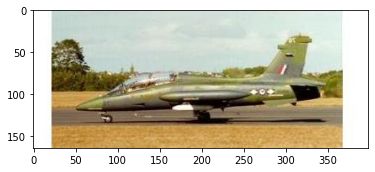

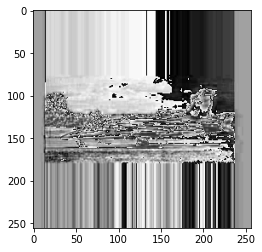

In [229]:
%%time 
# 
# Source: https://discuss.pytorch.org/t/how-to-save-image/48808/4
# Source: https://stackoverflow.com/questions/3925096/how-to-get-only-the-last-part-of-a-path-in-python
# Source: https://towardsdatascience.com/dont-use-python-os-library-any-more-when-pathlib-can-do-141fefb6bdb5
# Source: https://stackoverflow.com/questions/28348309/in-python-how-should-one-extract-the-second-last-directory-name-in-a-path
# Source: https://stackoverflow.com/questions/59218671/runtimeerror-output-with-shape-1-224-224-doesnt-match-the-broadcast-shape

image_count = {}

train_imgs_parent_dir = Path.cwd() / "20_categories_training"
print("Input Path:", train_imgs_parent_dir)

destination = Path.cwd() / "Preprocessed_Images_v2"
print("Output Parent Path:", destination)
Path(destination).mkdir(exist_ok=True)

for path_object in sorted(train_imgs_parent_dir.glob('**/*')):
    if path_object.is_file():
        print(f"hi, I'm a file: {path_object}")
        image_name_only = pathlib.PurePath(path_object).name
        subfolder_name_only = os.path.split(os.path.split(path_object)[0])[1]
        
        # (Path -> PIL)
        # If image = grayscale (2 channels), convert it to RGB (3 channels) 
        # Source: https://www.programcreek.com/python/example/89231/skimage.color.gray2rgb
        # Source: https://stackoverflow.com/questions/384759/how-to-convert-a-pil-image-into-a-numpy-array
        # if len(np.array(pil_image).shape) == 2:
        #   pil_image = color.gray2rgb(np.array(pil_image))
        #   pil_image = Image.fromarray(pil_image)
        # Source: https://pytorch.org/vision/stable/auto_examples/plot_scripted_tensor_transforms.html#sphx-glr-auto-examples-plot-scripted-tensor-transforms-py
        # Source: https://stackoverflow.com/questions/68207510/how-to-use-torchvision-io-read-image-with-image-as-variable-not-stored-file
        # print(type(path_object))
        # Color
        pil_image = Image.open(str(path_object)).convert('RGB')
        # Grayscale
        # pil_image = Image.open(str(path_object)).convert('L')

        # Show 1st Original image only (PIL -> PIL)
        if str(path_object) == "/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/20_categories_training/airplanes/airplanes_0001.jpg":
          # print("Orig Img:")
          plt.imshow(pil_image, "gray")
        
        # Preprocess image (PIL -> Tensor)
        tensor_img = preprocess(pil_image)
        # print(type(tensor_img))
        
        # Show 1st Postprocess image only (Tensor -> PIL)
        if str(path_object) == "/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/20_categories_training/airplanes/airplanes_0001.jpg":
          # print("Post Processed Img:")
          show(tensor_img)

        # Save image (Tensor -> JPEG)
        save_image(tensor_img, destination / subfolder_name_only / image_name_only)

        # EDA: Count number of images in each directory
        # Source: https://pythonguides.com/python-dictionary-increment-value/#:~:text=By%20using%20the%20get(),the%20value%20of%20the%20key.
        image_count[subfolder_name_only] = image_count.get(subfolder_name_only,0) + 1
        
    elif path_object.is_dir():
        print(f"hi, I'm a dir: {path_object}")
        subfolder_name_only = pathlib.PurePath(path_object).name
        Path(destination / subfolder_name_only).mkdir(exist_ok=True)

In [230]:
# Count of images per class
print(image_count)

{'airplanes': 80, 'bear': 68, 'blimp': 57, 'comet': 81, 'crab': 57, 'dog': 68, 'dolphin': 71, 'giraffe': 56, 'goat': 75, 'gorilla': 141, 'kangaroo': 55, 'killer-whale': 61, 'leopards': 127, 'llama': 79, 'penguin': 99, 'porcupine': 67, 'teddy-bear': 67, 'triceratops': 63, 'unicorn': 65, 'zebra': 64}


In [231]:
# Highest and Lowest counts of images per class
print(sorted(image_count, key=image_count.get, reverse=True))

['gorilla', 'leopards', 'penguin', 'comet', 'airplanes', 'llama', 'goat', 'dolphin', 'bear', 'dog', 'porcupine', 'teddy-bear', 'unicorn', 'zebra', 'triceratops', 'killer-whale', 'blimp', 'crab', 'giraffe', 'kangaroo']


# 1a. HOG - Feature extraction

/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0001.jpg


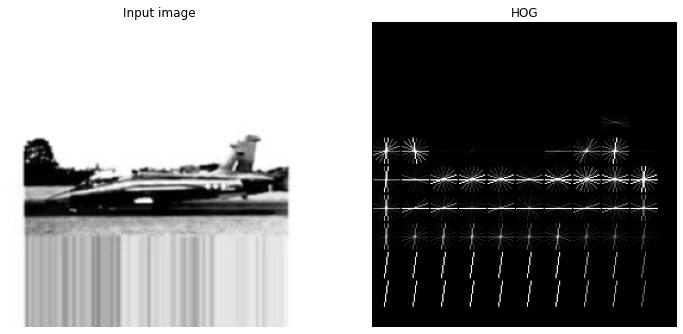

/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0002.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0003.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0004.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0005.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0006.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0007.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1

In [232]:
%%time
# Source: https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_hog.html
# Source: https://learnopencv.com/histogram-of-oriented-gradients/
# Source: https://stackoverflow.com/questions/44955480/python-histogram-of-oriented-gradients

input_path = Path.cwd() / "Preprocessed_Images_v2"
print(input_path)

out_feat = []

for i in sorted(input_path.glob('*/[!.]*.jpg')):
  print(i)
  im = cv2.imread(str(i))
  
  # Convert to graycsale
  gr = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 
  # Blur the image for better edge detection
  gr = cv2.GaussianBlur(gr, (3,3), sigmaX=0, sigmaY=0)
  image = gr

  # From source above
  # fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
  #                     cells_per_block=(1,1), visualize=True)
  # From class
  # fd, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8), 
                            # cells_per_block=(2, 2), visualize=True, multichannel=False)
  # Tweaked
  fd, hog_image = hog(image, orientations=9, pixels_per_cell=(24,24),
                      cells_per_block=(1,1), visualize=True)

  # Append to feature list
  out_feat.append(fd[np.newaxis, :])

  #-----------------------------------
  if str(i) == "/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0001.jpg":
    # Print 1 only becuase Buffered data was truncated after reaching the output size limit.
    fig, ax = plt.subplots(1, 2, figsize=(12, 12), sharex=True, sharey=True)

    ax[0].axis('off')
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].set_adjustable('box')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    # hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

    ax[1].axis('off')
    ax[1].imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax[1].set_title('HOG')
    ax[1].set_adjustable('box')
    plt.show()
    # break;

In [233]:
hog_features = np.vstack(out_feat)
print(hog_features.shape)

(1501, 900)


In [234]:
# Source: https://machinelearningmastery.com/how-to-save-a-numpy-array-to-file-for-machine-learning/
# save to npy file
np.save('hog_features.npy', hog_features)

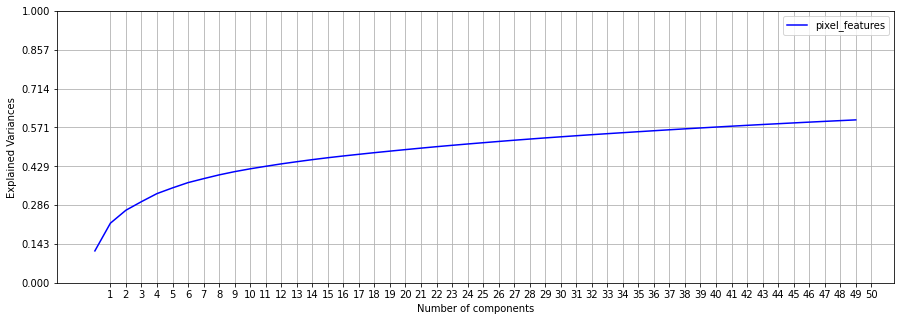

In [235]:
x = plot_PCA([hog_features], n_components=50)

# 1b. Harris Corner Detection - Feature extraction

/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0001.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0002.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0003.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0004.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0005.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGa

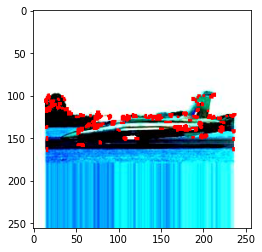

In [236]:
# Source: https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html
# Source: https://stackoverflow.com/questions/50355747/how-to-extract-keypoints-from-harris-corner-detector-using-opencv
# Source: https://github.com/opencv/opencv-python/issues/126
# Source: https://theailearner.com/tag/harris-corner-detector-opencv/
# Source: https://muthu.co/harris-corner-detector-implementation-in-python/

input_path = Path.cwd() / "Preprocessed_Images_v2"
print(input_path)

out_feat = []

for i in sorted(input_path.glob('*/[!.]*.jpg')):
  print(i)
  img = cv2.imread(str(i))

  # Convert to grayscale + floating point values
  gray = cv2.cvtColor(img,cv.COLOR_BGR2GRAY)
  # Blur the image for better edge detection
  gray = cv2.GaussianBlur(gray, (3,3), sigmaX=0, sigmaY=0)
  gray = np.float32(gray)

  # Mark the corners
  # dest = cv2.cornerHarris(gray, 4, 3, 0.04)
  dest = cv2.cornerHarris(gray, 2, 3, 0.04)
  # dest = cv2.cornerHarris(gray, 2, 5, 0.07)

  # Result is dilated for marking the corners
  dest = cv2.dilate(dest,None)
  
  # Reverting back to the original image,
  # with optimal threshold value
  img[dest > 0.01*dest.max()]=[255, 0, 0]
  
  # Flatten the features into out_feat
  out_feat.append(dest.flatten()[np.newaxis, :])

  #---------------------------------------------
  # Code will break if we show all the images
  if str(i) == "/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0001.jpg":
    plt.imshow(img, cmap=plt.cm.gray)
    # break;

In [237]:
harris_features = np.vstack(out_feat)
print(harris_features.shape)

(1501, 65536)


In [238]:
# Source: https://machinelearningmastery.com/how-to-save-a-numpy-array-to-file-for-machine-learning/
# save to npy file
np.save('harris_features.npy', harris_features)

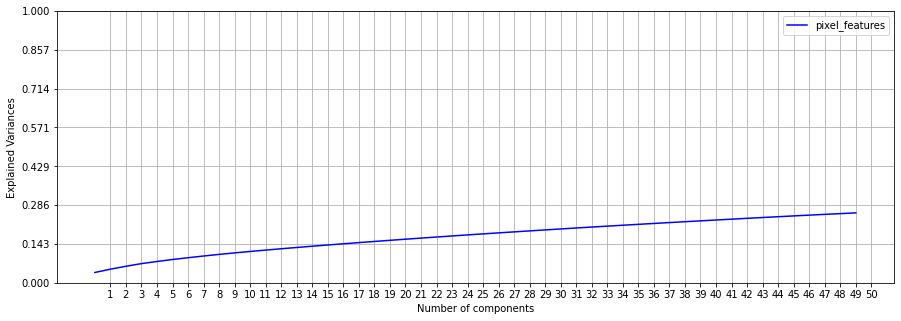

In [239]:
x = plot_PCA([harris_features], n_components=50)

# 1c. Sobel Edge Detection - Feature extraction

/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0001.jpg


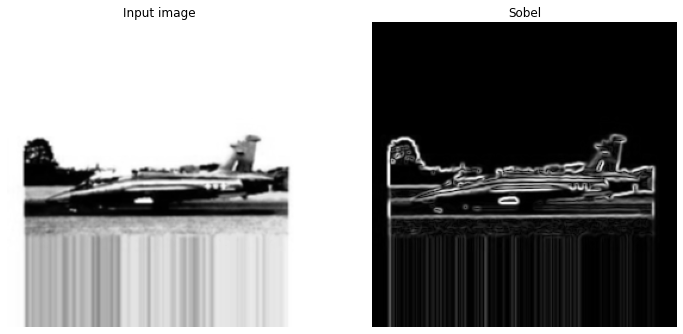

/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0002.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0003.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0004.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0005.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0006.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0007.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1

In [240]:
# Source: https://learnopencv.com/edge-detection-using-opencv/
input_path = Path.cwd() / "Preprocessed_Images_v2"
print(input_path)

out_feat = []

for i in sorted(input_path.glob('*/[!.]*.jpg')):
  print(i)
  im = cv2.imread(str(i))

  # Convert to graycsale
  img_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 

  # Blur the image for better edge detection
  img_blur = cv2.GaussianBlur(img_gray, (3,3), sigmaX=0, sigmaY=0)
  
  image = img_blur

  # Sklearn Sobel From class
  sobel_image = sobel(image)
  
  # OpenCV sobel
  # Source: https://learnopencv.com/edge-detection-using-opencv/
  # Combined X and Y Sobel Edge Detection
  # sobel_image = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
  out_feat.append(sobel_image.flatten()[np.newaxis, :])

  #---------------------------------------------
  if str(i) == "/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0001.jpg":
    # Buffered data was truncated after reaching the output size limit.
    fig, ax = plt.subplots(1, 2, figsize=(12, 12), sharex=True, sharey=True)

    ax[0].axis('off')
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].set_adjustable('box')

    ax[1].axis('off')
    ax[1].imshow(sobel_image, cmap=plt.cm.gray)
    ax[1].set_title('Sobel')
    ax[1].set_adjustable('box')

    plt.show()
    # break;

In [241]:
sobel_features = np.vstack(out_feat)
print(sobel_features.shape)

(1501, 65536)


In [242]:
# Source: https://machinelearningmastery.com/how-to-save-a-numpy-array-to-file-for-machine-learning/
# save to npy file
np.save('sobel_features.npy', sobel_features)

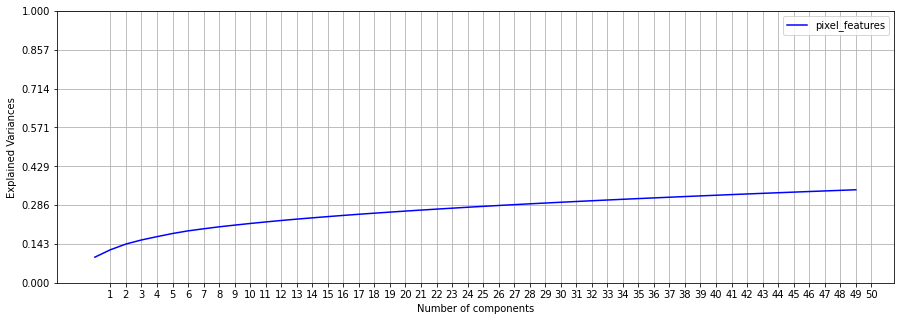

In [243]:
x = plot_PCA([sobel_features], n_components=50)

# 1d. PCA (Pixels) - Feature extraction

/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0001.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0002.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0003.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0004.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0005.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGa

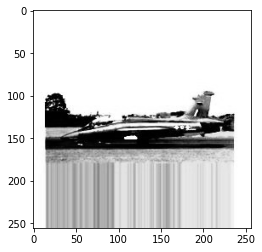

In [244]:
# Just for pixel feature extraction
# Source: https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118
# Source: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

out_feat = []

shape0_list = []
shape1_list = []
df_blue_list = []
df_green_list = []
df_red_list = []
blue_explained_variance_ratios = []
green_explained_variance_ratios = []
red_explained_variance_ratios = []

input_path = Path.cwd() / "Preprocessed_Images_v2"
print(input_path)

for i in sorted(input_path.glob('*/[!.]*.jpg')):
  # Read original color image, convert to grayscale
  # Source: https://stackoverflow.com/questions/60734639/i-want-to-use-imshow-in-colab-but-it-doesnt-work
  print(i)
  img = cv2.imread(str(i))
  # Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Do not need to gaussian blur because pure pixel analysis.

  # Source: Week 13 Notebook
  # Extract features
  out_feat.append(gray.flatten()[np.newaxis, :])

  #-----------------------------------------------
  # Show 1 image only
  if str(i) == "/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0001.jpg":
    plt.imshow(gray, cmap=plt.cm.gray)
    # break;

In [245]:
pixel_features = np.vstack(out_feat)
print(pixel_features.shape)

(1501, 65536)


In [246]:
# Source: https://machinelearningmastery.com/how-to-save-a-numpy-array-to-file-for-machine-learning/
# save to npy file
np.save('pixel_features.npy', pixel_features)

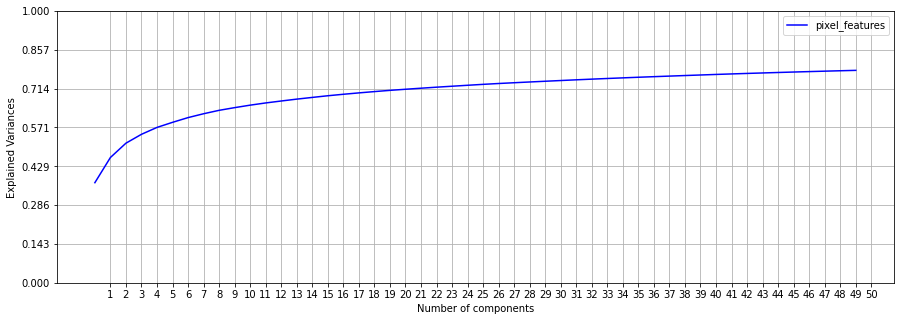

In [247]:
x = plot_PCA([pixel_features], n_components=50)

### [Archive] PCA compression and explained variance

In [248]:
  # Color image compression using PCA
  # # ------------------------ SVD did not converge with 37 features ---------------------------------------------
  # # ------------------------ All this code is supposed to go inside of the for loop above. KEEP.------------------------
  # # Print the shape so we know how many dimensions the image has
  # # print(img.shape)
  # shape0_list.append(img.shape[0])
  # shape1_list.append(img.shape[1])

  # # Split the image into 3 channels
  # blue,green,red = cv2.split(img)

  # # Divide all the data of all channels by 255 so that the data is scaled between 0 and 1
  # df_blue = blue/255
  # df_green = green/255
  # df_red = red/255
  # # df_blue_list.append(df_blue)
  # # df_green_list.append(df_green)
  # # df_red_list.append(df_red)

  # # Fit and transform the data in PCA
  # # 10% of the above average shapes = 34-40 PCA components
  # n_components = 37

  # pca_b = PCA(n_components=n_components)
  # pca_b.fit(df_blue)
  # trans_pca_b = pca_b.transform(df_blue)
  # pca_g = PCA(n_components=n_components)
  # pca_g.fit(df_green)
  # trans_pca_g = pca_g.transform(df_green)
  # pca_r = PCA(n_components=n_components)
  # pca_r.fit(df_red)
  # trans_pca_r = pca_r.transform(df_red)

  # # print(trans_pca_b.shape)
  # # print(trans_pca_r.shape)
  # # print(trans_pca_g.shape)

  # # Check the sum of explained variance ratios of the 50 PCA components (i.e. most dominated 50 Eigenvalues) for each channel.
  # # print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
  # # print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
  # # print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")
  # blue_explained_variance_ratios.append(sum(pca_b.explained_variance_ratio_))
  # green_explained_variance_ratios.append(sum(pca_g.explained_variance_ratio_))
  # red_explained_variance_ratios.append(sum(pca_r.explained_variance_ratio_))

  # # Plot explained variance ratio by each Eigenvalues separately for each of the 3 channels
  # # Cant plot otherwise will run out of space
  # # fig = plt.figure(figsize = (15, 7.2)) 
  # # fig.add_subplot(131)
  # # plt.title("Blue Channel")
  # # plt.ylabel('Variation explained')
  # # plt.xlabel('Eigen Value')
  # # plt.bar(list(range(1,n_components+1)),pca_b.explained_variance_ratio_)
  # # fig.add_subplot(132)
  # # plt.title("Green Channel")
  # # plt.ylabel('Variation explained')
  # # plt.xlabel('Eigen Value')
  # # plt.bar(list(range(1,n_components+1)),pca_g.explained_variance_ratio_)
  # # fig.add_subplot(133)
  # # plt.title("Red Channel")
  # # plt.ylabel('Variation explained')
  # # plt.xlabel('Eigen Value')
  # # plt.bar(list(range(1,n_components+1)),pca_r.explained_variance_ratio_)
  # # plt.show()

  # # Merge the channels back into a reduced shape:
  # b_arr = pca_b.inverse_transform(trans_pca_b)
  # g_arr = pca_g.inverse_transform(trans_pca_g)
  # r_arr = pca_r.inverse_transform(trans_pca_r)
  # # print(b_arr.shape, g_arr.shape, r_arr.shape)
  # img_reduced = (cv2.merge((b_arr, g_arr, r_arr)))
  # # print(img_reduced.shape)

  # # Show reduced image
  # # Cant show otherwise will run out of space
  # # fig = plt.figure(figsize = (10, 7.2)) 
  # # fig.add_subplot(121)
  # # plt.title("Original Image")
  # # plt.imshow(img)
  # # fig.add_subplot(122)
  # # plt.title("Reduced Image")
  # # plt.imshow(img_reduced)
  # # plt.show()

  # # Save reduced image
  # destination = Path.cwd() / "Reduced_PCAed_images"
  # path_object = i
  
  # image_name_only = pathlib.PurePath(path_object).name
  # subfolder_name_only = os.path.split(os.path.split(path_object)[0])[1]
  # Path(destination / subfolder_name_only).mkdir(exist_ok=True)
  # opened_img = Image.open(path_object)
  # opened_img.save(destination / subfolder_name_only / image_name_only)

In [249]:
# Create same folder tree structure as train folder.
# Spent 5+ hours on this, this is the real gold mine.
# Source: https://stackoverflow.com/questions/3925096/how-to-get-only-the-last-part-of-a-path-in-python
# Source: https://towardsdatascience.com/dont-use-python-os-library-any-more-when-pathlib-can-do-141fefb6bdb5
# Source: https://stackoverflow.com/questions/28348309/in-python-how-should-one-extract-the-second-last-directory-name-in-a-path

# destination = Path.cwd() / "Reduced_PCAed_images"
# print("Output Parent Path:", destination)
# print("Input Path:", train_imgs_parent_dir)

# for path_object in train_imgs_parent_dir.glob('**/*'):
#     if path_object.is_file():
#         print(f"hi, I'm a file: {path_object}")
#         image_name_only = pathlib.PurePath(path_object).name
#         subfolder_name_only = os.path.split(os.path.split(path_object)[0])[1]
#         # opened_img = Image.open(path_object)
#         # opened_img.save(destination / subfolder_name_only / image_name_only)
#     elif path_object.is_dir():
#         print(f"hi, I'm a dir: {path_object}")
#         subfolder_name_only = pathlib.PurePath(path_object).name
#         # Path(destination / subfolder_name_only).mkdir(exist_ok=True)

97% of variance is explained by 37 components, which is very close to 1.

In [250]:
# print(np.average(shape0_list))
# print(np.average(shape1_list))
# print(np.average(blue_explained_variance_ratios))
# print(np.average(green_explained_variance_ratios))
# print(np.average(red_explained_variance_ratios))

# [1 time run only] 1e. Pretrained Resnet 101 - Feature Extraction 

In [468]:
# load the model
resnet101 = models.resnet101(pretrained=True)
# Dropping output layer (the ImageNet classifier)
def slice_model(original_model, from_layer=None, to_layer=None):
    return nn.Sequential(*list(original_model.children())[from_layer:to_layer])
model_conv_features = slice_model(resnet101, to_layer=-1).to('cuda')

In [469]:
# Preprocessing customized for Resnet101 only.
preprocess_resnet = transforms.Compose([
    SquarePad(),
    transforms.Resize(end_img_size),
    transforms.CenterCrop(end_img_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [470]:
%%time
# Source: Week 13 Notebook
# Source: https://towardsdatascience.com/transform-grayscale-images-to-rgb-using-pythons-matplotlib-6a0625d992dd
input_path = Path.cwd() / "Preprocessed_Images_v2"
print(input_path)

out_feat = []

for i in sorted(input_path.glob('*/[!.]*.jpg')):
  print(i)
  im = cv2.imread(str(i))
  # plt.imshow(im)
  in_imgs = im

  for i in range(in_imgs.shape[0]):

    # convert the grayscale to RGB images
    cur_rgb = np.stack([in_imgs[i,:,:], in_imgs[i,:,:], in_imgs[i,:,:]], axis=2)
    if np.max(cur_rgb)>1:
      cur_rgb = cur_rgb.astype(np.uint8)
    else:
      cur_rgb = (cur_rgb*255).astype(np.uint8)
    
    # preprocess the image to prepare it for input to CNN
    out_im = preprocess_resnet(Image.fromarray(cur_rgb))
    # Use GPU with .cpu().detach() instead of just .detach()
    # Source: https://stackoverflow.com/questions/53467215/convert-pytorch-tensor-to-numpy-array-using-cuda
    out_feat.append(model_conv_features(out_im.unsqueeze(0).to('cuda')).squeeze().cpu().detach().numpy())

    # Print shape of 1st one:
    # if i==0:
    #     print(out_feat[0].shape)
    #     break;

/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0001.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0002.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0003.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0004.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2/airplanes/airplanes_0005.jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGa

In [471]:
# resnet101_features2 = np.stack(out_feat, axis=0)
# print(resnet101_features2.shape)

(384256, 2048)


In [472]:
# Source: https://machinelearningmastery.com/how-to-save-a-numpy-array-to-file-for-machine-learning/
# save to npy file
# np.save('resnet101_features2.npy', resnet101_features2)

# 2a. PCA + Explained Variance Graph

In [251]:
# Load Features from .npy files saved previously
# Source: https://machinelearningmastery.com/how-to-save-a-numpy-array-to-file-for-machine-learning/
# load array
pixel_features = np.load('pixel_features.npy')
hog_features = np.load('hog_features.npy')
harris_features = np.load('harris_features.npy')
sobel_features = np.load('sobel_features.npy')
resnet101_features = np.load('resnet101_features2.npy')
print(pixel_features.shape, hog_features.shape, harris_features.shape, sobel_features.shape, resnet101_features.shape)

(1501, 65536) (1501, 900) (1501, 65536) (1501, 65536) (384256, 2048)


In [252]:
# Reshape resnet array into 1501
# Source: https://stackoverflow.com/questions/71830589/how-to-reshape-an-array-from-vstack-into-regular-stack
resnet101_features_reshaped = resnet101_features.reshape((1501, -1))
print(resnet101_features_reshaped.shape)

(1501, 524288)


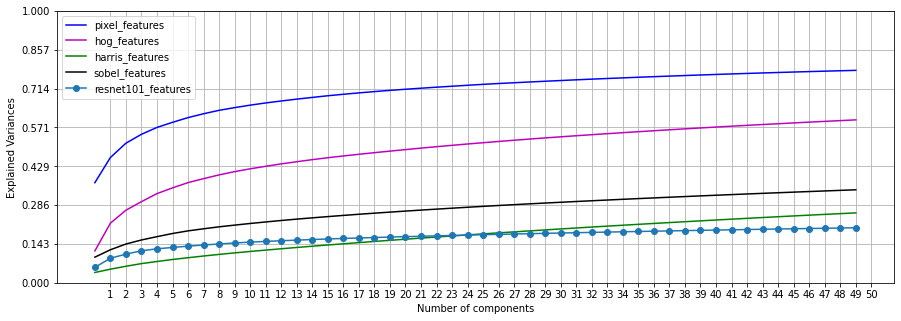

CPU times: user 3min 3s, sys: 39.9 s, total: 3min 43s
Wall time: 1min 6s


In [253]:
%%time
# Full plot explained variance vs the number of components for PCA
x = plot_PCA([pixel_features, hog_features, harris_features, sobel_features, resnet101_features_reshaped], n_components=50)

# 2b. PCA + TSNE Feature Plots

In [313]:
%%time
# pixel dimensionality reduction (2D)
X_pixels_pca, X_hog_pca, X_harris_pca, X_sobel_pca, X_resnet_pca = get_PCA([pixel_features, hog_features, harris_features, sobel_features, resnet101_features_reshaped], n_components=2)[-1]

CPU times: user 1min 52s, sys: 21.4 s, total: 2min 13s
Wall time: 39.9 s


In [314]:
%%time
X_pixels_tsne, X_hog_tsne, X_harris_tsne, X_sobel_tsne, X_resnet_tsne = get_tsne([pixel_features, hog_features, harris_features, sobel_features, resnet101_features_reshaped], n_components=2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

CPU times: user 4min 55s, sys: 34.7 s, total: 5min 30s
Wall time: 1min 30s


In [315]:
def plot_classes(X, y, ax, title):

  colormap = plt.cm.tab20 #nipy_spectral #, Set1,Paired
  # print(colormap[0])
  colorst = [colormap(i) for i in np.linspace(0, 1.0, len(np.unique(y)))]
  # print(colorst)

  for k in range(len(np.unique(y))):
    if X.shape[1] == 2:
      ax.scatter(X[y==k, 0], X[y==k, 1], alpha=0.5, facecolors=colorst[k])
      # print(colorst[k])
      # break;
    else:
      ax.scatter(X[y==k, 0], X[y==k, 1], X[y==k, 2], alpha=0.5, facecolors=colorst[k])
  
  ax.set_title(title)

[ 0  0  0 ... 19 19 19]
(1501,)


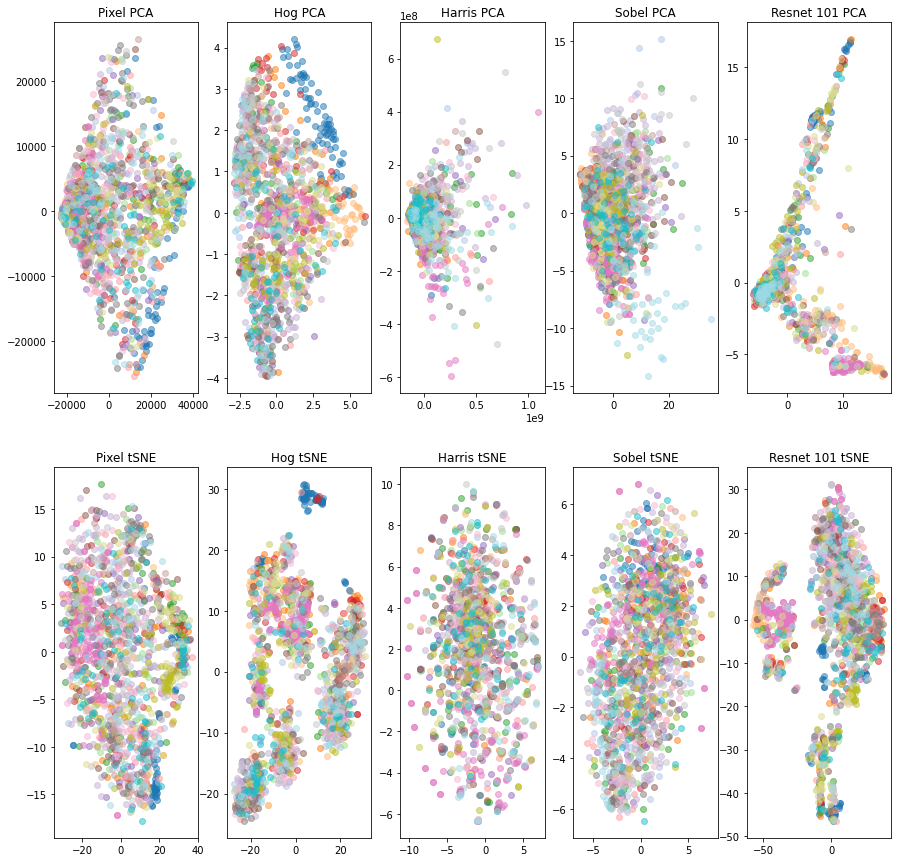

In [316]:
# Transpose plots
# project the features into 2 dimensions
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15,15))

# Change numerical classes from list into numpy array
np_train_classes = np.array(target_y)
print(np_train_classes)
print(np_train_classes.shape)

# y = numerical class_labels
# Source for identifying the labels, its called "tab20": https://matplotlib.org/stable/tutorials/colors/colormaps.html
plot_classes(X_pixels_pca, np_train_classes, ax[0,0], title='Pixel PCA')
plot_classes(X_pixels_tsne, np_train_classes, ax[1,0], title='Pixel tSNE')

plot_classes(X_hog_pca, np_train_classes, ax[0,1], title='Hog PCA')
plot_classes(X_hog_tsne, np_train_classes, ax[1,1], title='Hog tSNE')

plot_classes(X_harris_pca, np_train_classes, ax[0,2], title='Harris PCA')
plot_classes(X_harris_tsne, np_train_classes, ax[1,2], title='Harris tSNE')

plot_classes(X_sobel_pca, np_train_classes, ax[0,3], title='Sobel PCA')
plot_classes(X_sobel_tsne, np_train_classes, ax[1,3], title='Sobel tSNE')

plot_classes(X_resnet_pca, np_train_classes, ax[0,4], title='Resnet 101 PCA')
plot_classes(X_resnet_tsne, np_train_classes, ax[1,4], title='Resnet 101 tSNE')

plt.show()

[ 0  0  0 ... 19 19 19]
(1501,)


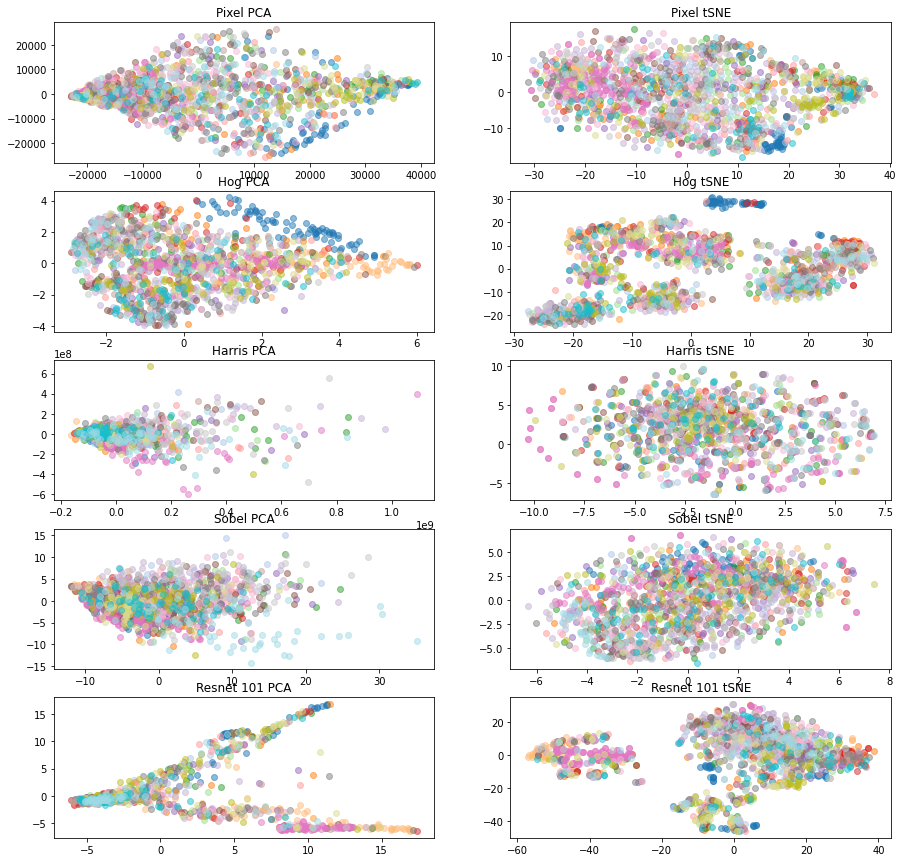

In [320]:
# project the features into 2 dimensions
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,15))

# Change numerical classes from list into numpy array
np_train_classes = np.array(target_y)
print(np_train_classes)
print(np_train_classes.shape)

# y = numerical class_labels
# Source for identifying the labels, its called "tab20": https://matplotlib.org/stable/tutorials/colors/colormaps.html
plot_classes(X_pixels_pca, np_train_classes, ax[0,0], title='Pixel PCA')
plot_classes(X_pixels_tsne, np_train_classes, ax[0,1], title='Pixel tSNE')

plot_classes(X_hog_pca, np_train_classes, ax[1,0], title='Hog PCA')
plot_classes(X_hog_tsne, np_train_classes, ax[1,1], title='Hog tSNE')

plot_classes(X_harris_pca, np_train_classes, ax[2,0], title='Harris PCA')
plot_classes(X_harris_tsne, np_train_classes, ax[2,1], title='Harris tSNE')

plot_classes(X_sobel_pca, np_train_classes, ax[3,0], title='Sobel PCA')
plot_classes(X_sobel_tsne, np_train_classes, ax[3,1], title='Sobel tSNE')

plot_classes(X_resnet_pca, np_train_classes, ax[4,0], title='Resnet 101 PCA')
plot_classes(X_resnet_tsne, np_train_classes, ax[4,1], title='Resnet 101 tSNE')

plt.show()

In [321]:
X_pixels_PCA_tsne = get_tsne([get_PCA([pixel_features], n_components=10)[-1][0]], n_components=2)[0]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


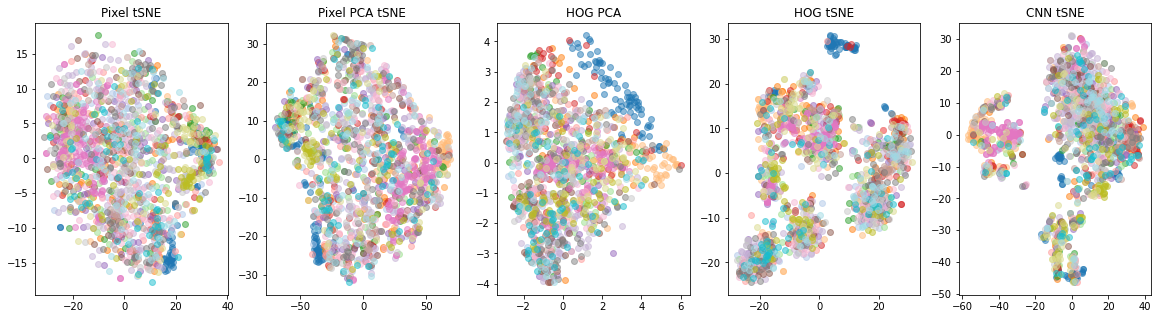

In [325]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

# y is the class labels
plot_classes(X_pixels_tsne, y, ax[0], title='Pixel tSNE')
plot_classes(X_pixels_PCA_tsne, y, ax[1], title='Pixel PCA tSNE')
plot_classes(X_hog_pca, y, ax[2], title='HOG PCA')
plot_classes(X_hog_tsne, y, ax[3], title='HOG tSNE')
plot_classes(X_resnet_tsne, y, ax[4], title='CNN tSNE')
plt.show()

# 3. Classification Models

## Setup

In [259]:
# get the train and test split
n_components = 20
input_path = Path.cwd() / "Preprocessed_Images_v2"

train_idx, val_idx = train_test_split(np.arange(len(sorted(list(input_path.glob('*/[!.]*.jpg'))))), test_size=0.20, random_state=42)

In [260]:
y_pred_list = []
y_actuals_list = []

def train_classifier(in_feat, in_y, in_train_idx, val_idx, model):

  global y_pred_list
  global y_actuals_list

  # get the train and validation split
  X_train = in_feat[in_train_idx, :].copy()
  print(X_train.shape)
  y_train = in_y[in_train_idx].copy()
  X_val = in_feat[val_idx, :].copy()
  y_val = in_y[val_idx].copy()
  y_actuals_list.append(y_val)

  # Standard Scaler Explanation Source: https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657
  # scaling
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_val = scaler.transform(X_val)

  # Select your model
  if model == "logistic_regression":
    param_grid = {"C": loguniform(1e-3, 1e5), "solver": ['liblinear', 'lbfgs']}
    # Rachel OH: In LogisticRegression(), do param of: class_weight = "balanced".
    # Source: https://stackoverflow.com/questions/30972029/how-does-the-class-weight-parameter-in-scikit-learn-work
    # Source: https://stackoverflow.com/questions/19018333/gridsearchcv-on-logisticregression-in-scikit-learn
    # Source: https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati
    clf = RandomizedSearchCV(LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000), param_grid, n_iter=10)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    y_pred_list.append(y_pred)
  elif model == "knn":
    # Source: https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657
    param_grid = { 'n_neighbors': [3, 5, 7, 9, 11], 'p':[1,2], 'weights':['uniform', 'distance']}
    clf = RandomizedSearchCV(KNeighborsClassifier(), param_grid, n_iter=10)
    # clf = RandomizedSearchCV(KNeighborsClassifier(p='p', n_neighbors = 'n_neighbors', weights = 'weights'), param_grid, n_iter=10)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    y_pred_list.append(y_pred)
  elif model == "svm":
    # Source: https://rpubs.com/Sharon_1684/454441
    # Source: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
    # Source: https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/
    param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.0001],
              'kernel': ['rbf', 'sigmoid']}
    clf = RandomizedSearchCV(SVC(), param_grid, refit = True)
    # clf = RandomizedSearchCV(SVC(kernel='linear', probability=True, random_state=42), param_grid, n_iter=10)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    y_pred_list.append(y_pred)

  return accuracy_score(y_val, y_pred)

In [261]:
basic_list_of_accs = []

## 3a. Logistic Regression

In [262]:
model_name = "logistic_regression"

In [263]:
%%time
print('HOG Feature Accuracy')
hog_acc = []
for n in range(n_components):
  _, X = get_PCA([hog_features], n_components=n+1)
  hog_acc.append(train_classifier(X[0], np_train_classes, train_idx, val_idx, model_name))

HOG Feature Accuracy
(1200, 1)
(1200, 2)
(1200, 3)
(1200, 4)
(1200, 5)
(1200, 6)
(1200, 7)
(1200, 8)
(1200, 9)
(1200, 10)
(1200, 11)
(1200, 12)
(1200, 13)
(1200, 14)
(1200, 15)
(1200, 16)
(1200, 17)
(1200, 18)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


(1200, 19)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


(1200, 20)
CPU times: user 2min 50s, sys: 4min 5s, total: 6min 55s
Wall time: 2min 13s


F1 Score: 0.2637315172172674
Accuracy: 0.2724252491694352
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.14      0.10      0.12        10
           2       0.10      0.25      0.14         8
           3       0.53      0.44      0.48        18
           4       0.16      0.30      0.21        10
           5       0.00      0.00      0.00        14
           6       0.23      0.14      0.18        21
           7       0.15      0.18      0.17        11
           8       0.09      0.06      0.07        17
           9       0.33      0.12      0.17        26
          10       0.25      0.47      0.33        15
          11       0.07      0.07      0.07        14
          12       0.70      0.84      0.76        19
          13       0.24      0.25      0.24        20
          14       0.29      0.20      0.24        20
          15       0.00      0.00      0.00        12
          16       0.17

[Text(0, 0.5, 'airplanes'),
 Text(0, 1.5, 'bear'),
 Text(0, 2.5, 'blimp'),
 Text(0, 3.5, 'comet'),
 Text(0, 4.5, 'crab'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'dolphin'),
 Text(0, 7.5, 'giraffe'),
 Text(0, 8.5, 'goat'),
 Text(0, 9.5, 'gorilla'),
 Text(0, 10.5, 'kangaroo'),
 Text(0, 11.5, 'killer-whale'),
 Text(0, 12.5, 'leopards'),
 Text(0, 13.5, 'llama'),
 Text(0, 14.5, 'penguin'),
 Text(0, 15.5, 'porcupine'),
 Text(0, 16.5, 'teddy-bear'),
 Text(0, 17.5, 'triceratops'),
 Text(0, 18.5, 'unicorn'),
 Text(0, 19.5, 'zebra')]

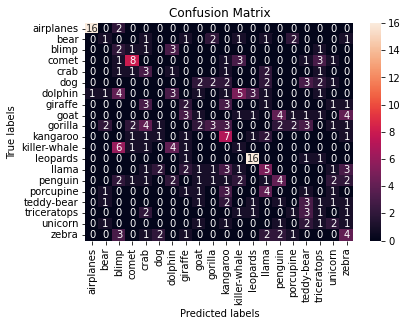

In [264]:
# Last model, y_pred_list[-1], is the PCA with 20 outputs.
# Plot confusion matrix and classification report.
cm = confusion_matrix(y_actuals_list[-1], y_pred_list[-1])
acc = accuracy_score(y_actuals_list[-1], y_pred_list[-1])
class_rep = classification_report(y_actuals_list[-1], y_pred_list[-1])
f1 = f1_score(y_actuals_list[-1], y_pred_list[-1], average='weighted')
print("F1 Score:", f1)
print("Accuracy:", acc)
print(class_rep)
basic_list_of_accs.append(f"{model_name}: {acc}")
print(basic_list_of_accs)

# Source: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
# Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
text_labels = list(train_classes_dict)
ax.xaxis.set_ticklabels(text_labels)
ax.yaxis.set_ticklabels(text_labels)

In [265]:
%%time
print('Harris Feature Accuracy')
harris_acc = []
for n in range(n_components):
  _, X = get_PCA([harris_features], n_components=n+1)
  harris_acc.append(train_classifier(X[0], np_train_classes, train_idx, val_idx, model_name))

Harris Feature Accuracy
(1200, 1)
(1200, 2)
(1200, 3)
(1200, 4)
(1200, 5)
(1200, 6)
(1200, 7)
(1200, 8)
(1200, 9)
(1200, 10)
(1200, 11)
(1200, 12)
(1200, 13)
(1200, 14)
(1200, 15)
(1200, 16)
(1200, 17)
(1200, 18)
(1200, 19)
(1200, 20)
CPU times: user 4min 42s, sys: 3min 8s, total: 7min 50s
Wall time: 2min 35s


F1 Score: 0.1537606972210924
Accuracy: 0.19269102990033224
              precision    recall  f1-score   support

           0       0.57      0.94      0.71        18
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
           3       0.23      0.78      0.35        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        14
           6       0.25      0.29      0.27        21
           7       0.11      0.09      0.10        11
           8       0.20      0.06      0.09        17
           9       0.30      0.12      0.17        26
          10       0.08      0.07      0.07        15
          11       0.25      0.21      0.23        14
          12       0.27      0.37      0.31        19
          13       0.00      0.00      0.00        20
          14       0.00      0.00      0.00        20
          15       0.14      0.08      0.11        12
          16       0.1

[Text(0, 0.5, 'airplanes'),
 Text(0, 1.5, 'bear'),
 Text(0, 2.5, 'blimp'),
 Text(0, 3.5, 'comet'),
 Text(0, 4.5, 'crab'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'dolphin'),
 Text(0, 7.5, 'giraffe'),
 Text(0, 8.5, 'goat'),
 Text(0, 9.5, 'gorilla'),
 Text(0, 10.5, 'kangaroo'),
 Text(0, 11.5, 'killer-whale'),
 Text(0, 12.5, 'leopards'),
 Text(0, 13.5, 'llama'),
 Text(0, 14.5, 'penguin'),
 Text(0, 15.5, 'porcupine'),
 Text(0, 16.5, 'teddy-bear'),
 Text(0, 17.5, 'triceratops'),
 Text(0, 18.5, 'unicorn'),
 Text(0, 19.5, 'zebra')]

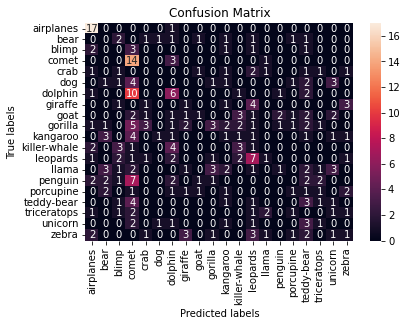

In [266]:
# Last model, y_pred_list[-1], is the PCA with 20 outputs.
# Plot confusion matrix and classification report.
cm = confusion_matrix(y_actuals_list[-1], y_pred_list[-1])
acc = accuracy_score(y_actuals_list[-1], y_pred_list[-1])
class_rep = classification_report(y_actuals_list[-1], y_pred_list[-1])
f1 = f1_score(y_actuals_list[-1], y_pred_list[-1], average='weighted')
print("F1 Score:", f1)
print("Accuracy:", acc)
print(class_rep)
basic_list_of_accs.append(f"{model_name}: {acc}")
print(basic_list_of_accs)

# Source: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
# Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
text_labels = list(train_classes_dict)
ax.xaxis.set_ticklabels(text_labels)
ax.yaxis.set_ticklabels(text_labels)

In [267]:
%%time
print('Sobel Feature Accuracy')
sobel_acc = []
for n in range(n_components):
  _, X = get_PCA([sobel_features], n_components=n+1)
  sobel_acc.append(train_classifier(X[0], np_train_classes, train_idx, val_idx, model_name))

Sobel Feature Accuracy
(1200, 1)
(1200, 2)
(1200, 3)
(1200, 4)
(1200, 5)
(1200, 6)
(1200, 7)
(1200, 8)
(1200, 9)
(1200, 10)
(1200, 11)
(1200, 12)
(1200, 13)
(1200, 14)
(1200, 15)
(1200, 16)
(1200, 17)
(1200, 18)
(1200, 19)
(1200, 20)
CPU times: user 6min 57s, sys: 2min 44s, total: 9min 41s
Wall time: 2min 59s


F1 Score: 0.19806208754233326
Accuracy: 0.22591362126245848
              precision    recall  f1-score   support

           0       0.56      0.83      0.67        18
           1       0.00      0.00      0.00        10
           2       0.11      0.25      0.15         8
           3       0.40      0.67      0.50        18
           4       0.07      0.10      0.08        10
           5       0.00      0.00      0.00        14
           6       0.12      0.10      0.11        21
           7       0.08      0.09      0.09        11
           8       0.00      0.00      0.00        17
           9       0.23      0.12      0.15        26
          10       0.15      0.20      0.17        15
          11       0.07      0.07      0.07        14
          12       0.43      0.63      0.51        19
          13       0.40      0.10      0.16        20
          14       0.00      0.00      0.00        20
          15       0.00      0.00      0.00        12
          16       0.

[Text(0, 0.5, 'airplanes'),
 Text(0, 1.5, 'bear'),
 Text(0, 2.5, 'blimp'),
 Text(0, 3.5, 'comet'),
 Text(0, 4.5, 'crab'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'dolphin'),
 Text(0, 7.5, 'giraffe'),
 Text(0, 8.5, 'goat'),
 Text(0, 9.5, 'gorilla'),
 Text(0, 10.5, 'kangaroo'),
 Text(0, 11.5, 'killer-whale'),
 Text(0, 12.5, 'leopards'),
 Text(0, 13.5, 'llama'),
 Text(0, 14.5, 'penguin'),
 Text(0, 15.5, 'porcupine'),
 Text(0, 16.5, 'teddy-bear'),
 Text(0, 17.5, 'triceratops'),
 Text(0, 18.5, 'unicorn'),
 Text(0, 19.5, 'zebra')]

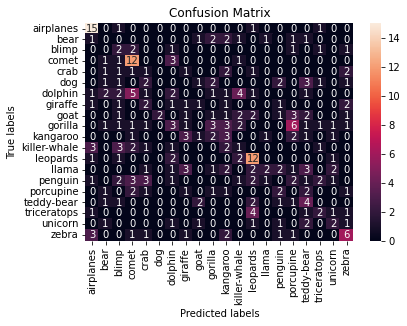

In [268]:
# Last model, y_pred_list[-1], is the PCA with 20 outputs.
# Plot confusion matrix and classification report.
cm = confusion_matrix(y_actuals_list[-1], y_pred_list[-1])
acc = accuracy_score(y_actuals_list[-1], y_pred_list[-1])
class_rep = classification_report(y_actuals_list[-1], y_pred_list[-1])
f1 = f1_score(y_actuals_list[-1], y_pred_list[-1], average='weighted')
print("F1 Score:", f1)
print("Accuracy:", acc)
print(class_rep)
basic_list_of_accs.append(f"{model_name}: {acc}")
print(basic_list_of_accs)

# Source: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
# Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
text_labels = list(train_classes_dict)
ax.xaxis.set_ticklabels(text_labels)
ax.yaxis.set_ticklabels(text_labels)

In [269]:
%%time
print('Resnet Feature Accuracy')
# get accuracy with different features
resnet_acc = []
for n in range(n_components):
  _, X = get_PCA([pixel_features], n_components=n+1)
  resnet_acc.append(train_classifier(X[0], np_train_classes, train_idx, val_idx, model_name))

Resnet Feature Accuracy
(1200, 1)
(1200, 2)
(1200, 3)
(1200, 4)
(1200, 5)
(1200, 6)
(1200, 7)
(1200, 8)
(1200, 9)
(1200, 10)
(1200, 11)
(1200, 12)
(1200, 13)
(1200, 14)
(1200, 15)
(1200, 16)
(1200, 17)
(1200, 18)
(1200, 19)
(1200, 20)
CPU times: user 7min 10s, sys: 3min 6s, total: 10min 16s
Wall time: 3min 9s


F1 Score: 0.16544724975955624
Accuracy: 0.2026578073089701
              precision    recall  f1-score   support

           0       0.67      0.89      0.76        18
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
           3       0.33      0.61      0.43        18
           4       0.00      0.00      0.00        10
           5       0.06      0.07      0.07        14
           6       0.12      0.05      0.07        21
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00        17
           9       0.28      0.19      0.23        26
          10       0.05      0.07      0.06        15
          11       0.08      0.07      0.08        14
          12       0.40      0.89      0.56        19
          13       0.10      0.05      0.07        20
          14       0.00      0.00      0.00        20
          15       0.00      0.00      0.00        12
          16       0.1

[Text(0, 0.5, 'airplanes'),
 Text(0, 1.5, 'bear'),
 Text(0, 2.5, 'blimp'),
 Text(0, 3.5, 'comet'),
 Text(0, 4.5, 'crab'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'dolphin'),
 Text(0, 7.5, 'giraffe'),
 Text(0, 8.5, 'goat'),
 Text(0, 9.5, 'gorilla'),
 Text(0, 10.5, 'kangaroo'),
 Text(0, 11.5, 'killer-whale'),
 Text(0, 12.5, 'leopards'),
 Text(0, 13.5, 'llama'),
 Text(0, 14.5, 'penguin'),
 Text(0, 15.5, 'porcupine'),
 Text(0, 16.5, 'teddy-bear'),
 Text(0, 17.5, 'triceratops'),
 Text(0, 18.5, 'unicorn'),
 Text(0, 19.5, 'zebra')]

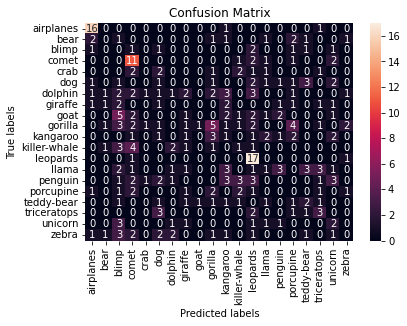

In [270]:
# Last model, y_pred_list[-1], is the PCA with 20 outputs.
# Plot confusion matrix and classification report.
cm = confusion_matrix(y_actuals_list[-1], y_pred_list[-1])
acc = accuracy_score(y_actuals_list[-1], y_pred_list[-1])
class_rep = classification_report(y_actuals_list[-1], y_pred_list[-1])
f1 = f1_score(y_actuals_list[-1], y_pred_list[-1], average='weighted')
print("F1 Score:", f1)
print("Accuracy:", acc)
print(class_rep)
basic_list_of_accs.append(f"{model_name}: {acc}")
print(basic_list_of_accs)

# Source: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
# Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
text_labels = list(train_classes_dict)
ax.xaxis.set_ticklabels(text_labels)
ax.yaxis.set_ticklabels(text_labels)

In [271]:
# Takes forever, do last.
%%time
print('Pixel Feature Accuracy')
# get accuracy with different features
pixel_acc = []
for n in range(n_components):
  _, X = get_PCA([pixel_features], n_components=n+1)
  pixel_acc.append(train_classifier(X[0], np_train_classes, train_idx, val_idx, model_name))

Pixel Feature Accuracy
(1200, 1)
(1200, 2)
(1200, 3)
(1200, 4)
(1200, 5)
(1200, 6)
(1200, 7)
(1200, 8)
(1200, 9)
(1200, 10)
(1200, 11)
(1200, 12)
(1200, 13)
(1200, 14)
(1200, 15)
(1200, 16)
(1200, 17)
(1200, 18)
(1200, 19)
(1200, 20)
CPU times: user 7min 2s, sys: 3min 22s, total: 10min 24s
Wall time: 3min 26s


F1 Score: 0.16780282163975996
Accuracy: 0.2026578073089701
              precision    recall  f1-score   support

           0       0.67      0.89      0.76        18
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
           3       0.33      0.61      0.43        18
           4       0.00      0.00      0.00        10
           5       0.06      0.07      0.07        14
           6       0.12      0.05      0.07        21
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00        17
           9       0.26      0.19      0.22        26
          10       0.05      0.07      0.06        15
          11       0.08      0.07      0.08        14
          12       0.46      0.89      0.61        19
          13       0.10      0.05      0.07        20
          14       0.00      0.00      0.00        20
          15       0.00      0.00      0.00        12
          16       0.1

[Text(0, 0.5, 'airplanes'),
 Text(0, 1.5, 'bear'),
 Text(0, 2.5, 'blimp'),
 Text(0, 3.5, 'comet'),
 Text(0, 4.5, 'crab'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'dolphin'),
 Text(0, 7.5, 'giraffe'),
 Text(0, 8.5, 'goat'),
 Text(0, 9.5, 'gorilla'),
 Text(0, 10.5, 'kangaroo'),
 Text(0, 11.5, 'killer-whale'),
 Text(0, 12.5, 'leopards'),
 Text(0, 13.5, 'llama'),
 Text(0, 14.5, 'penguin'),
 Text(0, 15.5, 'porcupine'),
 Text(0, 16.5, 'teddy-bear'),
 Text(0, 17.5, 'triceratops'),
 Text(0, 18.5, 'unicorn'),
 Text(0, 19.5, 'zebra')]

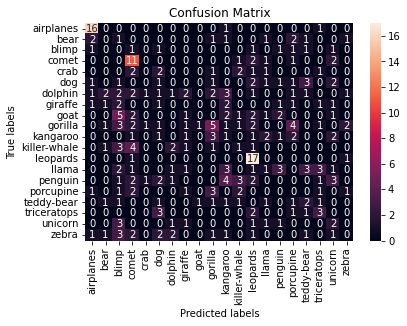

In [272]:
# Last model, y_pred_list[-1], is the PCA with 20 outputs.
# Plot confusion matrix and classification report.
cm = confusion_matrix(y_actuals_list[-1], y_pred_list[-1])
acc = accuracy_score(y_actuals_list[-1], y_pred_list[-1])
class_rep = classification_report(y_actuals_list[-1], y_pred_list[-1])
f1 = f1_score(y_actuals_list[-1], y_pred_list[-1], average='weighted')
print("F1 Score:", f1)
print("Accuracy:", acc)
print(class_rep)
basic_list_of_accs.append(f"{model_name}: {acc}")
print(basic_list_of_accs)

# Source: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
# Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
text_labels = list(train_classes_dict)
ax.xaxis.set_ticklabels(text_labels)
ax.yaxis.set_ticklabels(text_labels)

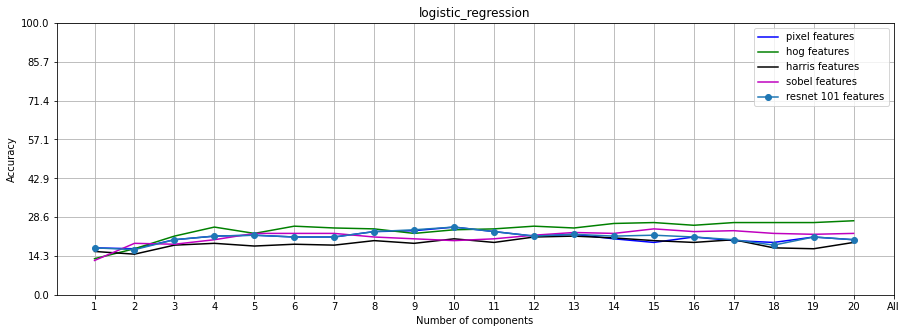

CPU times: user 172 ms, sys: 11.8 ms, total: 184 ms
Wall time: 180 ms


In [273]:
%%time
# plot the accuracy graph
plt.figure(figsize=(15,5))
plt.plot(np.array(pixel_acc)*100, 'b-', label='pixel features')
plt.plot(np.array(hog_acc)*100, 'g-', label='hog features')
plt.plot(np.array(harris_acc)*100, 'k-', label='harris features')
plt.plot(np.array(sobel_acc)*100, 'm-', label='sobel features')
plt.plot(np.array(resnet_acc)*100, 'o-', label='resnet 101 features')

xtick_labels = [f'{i+1}' for i in range(n_components)] + ['All']
plt.xticks(np.arange(n_components+1), labels=xtick_labels)
plt.yticks(np.linspace(0, 100, 8))
plt.grid(b=True)
plt.title(model_name)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.ylim([0, 100])
plt.legend()
plt.show()

## 3b. Nearest-neighbor clustering

In [274]:
model_name = "knn"

In [275]:
%%time
print('HOG Feature Accuracy')
hog_acc = []
for n in range(n_components):
  _, X = get_PCA([hog_features], n_components=n+1)
  hog_acc.append(train_classifier(X[0], np_train_classes, train_idx, val_idx, model_name))

HOG Feature Accuracy
(1200, 1)
(1200, 2)
(1200, 3)
(1200, 4)
(1200, 5)
(1200, 6)
(1200, 7)
(1200, 8)
(1200, 9)
(1200, 10)
(1200, 11)
(1200, 12)
(1200, 13)
(1200, 14)
(1200, 15)
(1200, 16)
(1200, 17)
(1200, 18)
(1200, 19)
(1200, 20)
CPU times: user 16.1 s, sys: 17 s, total: 33.1 s
Wall time: 12.4 s


F1 Score: 0.22737452193173502
Accuracy: 0.2558139534883721
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
           3       0.50      0.67      0.57        18
           4       0.11      0.20      0.14        10
           5       0.14      0.07      0.10        14
           6       0.12      0.05      0.07        21
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00        17
           9       0.25      0.35      0.29        26
          10       0.21      0.20      0.21        15
          11       0.50      0.14      0.22        14
          12       0.44      0.95      0.60        19
          13       0.25      0.20      0.22        20
          14       0.11      0.10      0.10        20
          15       0.06      0.08      0.07        12
          16       0.0

[Text(0, 0.5, 'airplanes'),
 Text(0, 1.5, 'bear'),
 Text(0, 2.5, 'blimp'),
 Text(0, 3.5, 'comet'),
 Text(0, 4.5, 'crab'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'dolphin'),
 Text(0, 7.5, 'giraffe'),
 Text(0, 8.5, 'goat'),
 Text(0, 9.5, 'gorilla'),
 Text(0, 10.5, 'kangaroo'),
 Text(0, 11.5, 'killer-whale'),
 Text(0, 12.5, 'leopards'),
 Text(0, 13.5, 'llama'),
 Text(0, 14.5, 'penguin'),
 Text(0, 15.5, 'porcupine'),
 Text(0, 16.5, 'teddy-bear'),
 Text(0, 17.5, 'triceratops'),
 Text(0, 18.5, 'unicorn'),
 Text(0, 19.5, 'zebra')]

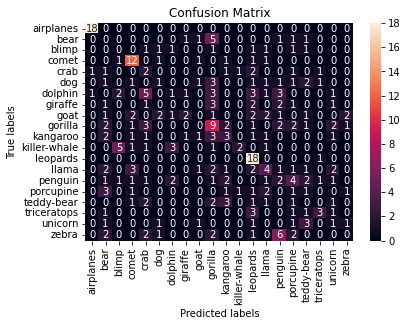

In [276]:
# Last model, y_pred_list[-1], is the PCA with 20 outputs.
# Plot confusion matrix and classification report.
cm = confusion_matrix(y_actuals_list[-1], y_pred_list[-1])
acc = accuracy_score(y_actuals_list[-1], y_pred_list[-1])
class_rep = classification_report(y_actuals_list[-1], y_pred_list[-1])
f1 = f1_score(y_actuals_list[-1], y_pred_list[-1], average='weighted')
print("F1 Score:", f1)
print("Accuracy:", acc)
print(class_rep)
basic_list_of_accs.append(f"{model_name}: {acc}")
print(basic_list_of_accs)

# Source: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
# Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
text_labels = list(train_classes_dict)
ax.xaxis.set_ticklabels(text_labels)
ax.yaxis.set_ticklabels(text_labels)

In [277]:
%%time
print('Harris Feature Accuracy')
harris_acc = []
for n in range(n_components):
  _, X = get_PCA([harris_features], n_components=n+1)
  harris_acc.append(train_classifier(X[0], np_train_classes, train_idx, val_idx, model_name))

Harris Feature Accuracy
(1200, 1)
(1200, 2)
(1200, 3)
(1200, 4)
(1200, 5)
(1200, 6)
(1200, 7)
(1200, 8)
(1200, 9)
(1200, 10)
(1200, 11)
(1200, 12)
(1200, 13)
(1200, 14)
(1200, 15)
(1200, 16)
(1200, 17)
(1200, 18)
(1200, 19)
(1200, 20)
CPU times: user 3min 24s, sys: 1min 45s, total: 5min 10s
Wall time: 1min 30s


F1 Score: 0.17414571790255332
Accuracy: 0.20930232558139536
              precision    recall  f1-score   support

           0       0.45      0.72      0.55        18
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
           3       0.30      0.78      0.44        18
           4       0.00      0.00      0.00        10
           5       0.08      0.07      0.08        14
           6       0.33      0.19      0.24        21
           7       0.00      0.00      0.00        11
           8       0.40      0.12      0.18        17
           9       0.14      0.15      0.15        26
          10       0.00      0.00      0.00        15
          11       0.33      0.29      0.31        14
          12       0.30      0.63      0.41        19
          13       0.09      0.05      0.06        20
          14       0.07      0.05      0.06        20
          15       0.12      0.08      0.10        12
          16       0.

[Text(0, 0.5, 'airplanes'),
 Text(0, 1.5, 'bear'),
 Text(0, 2.5, 'blimp'),
 Text(0, 3.5, 'comet'),
 Text(0, 4.5, 'crab'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'dolphin'),
 Text(0, 7.5, 'giraffe'),
 Text(0, 8.5, 'goat'),
 Text(0, 9.5, 'gorilla'),
 Text(0, 10.5, 'kangaroo'),
 Text(0, 11.5, 'killer-whale'),
 Text(0, 12.5, 'leopards'),
 Text(0, 13.5, 'llama'),
 Text(0, 14.5, 'penguin'),
 Text(0, 15.5, 'porcupine'),
 Text(0, 16.5, 'teddy-bear'),
 Text(0, 17.5, 'triceratops'),
 Text(0, 18.5, 'unicorn'),
 Text(0, 19.5, 'zebra')]

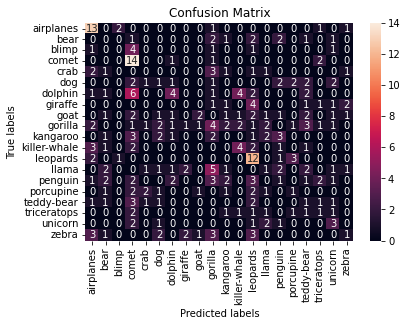

In [278]:
# Last model, y_pred_list[-1], is the PCA with 20 outputs.
# Plot confusion matrix and classification report.
cm = confusion_matrix(y_actuals_list[-1], y_pred_list[-1])
acc = accuracy_score(y_actuals_list[-1], y_pred_list[-1])
class_rep = classification_report(y_actuals_list[-1], y_pred_list[-1])
f1 = f1_score(y_actuals_list[-1], y_pred_list[-1], average='weighted')
print("F1 Score:", f1)
print("Accuracy:", acc)
print(class_rep)
basic_list_of_accs.append(f"{model_name}: {acc}")
print(basic_list_of_accs)

# Source: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
# Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
text_labels = list(train_classes_dict)
ax.xaxis.set_ticklabels(text_labels)
ax.yaxis.set_ticklabels(text_labels)

In [279]:
%%time
print('Sobel Feature Accuracy')
sobel_acc = []
for n in range(n_components):
  _, X = get_PCA([sobel_features], n_components=n+1)
  sobel_acc.append(train_classifier(X[0], np_train_classes, train_idx, val_idx, model_name))

Sobel Feature Accuracy
(1200, 1)
(1200, 2)
(1200, 3)
(1200, 4)
(1200, 5)
(1200, 6)
(1200, 7)
(1200, 8)
(1200, 9)
(1200, 10)
(1200, 11)
(1200, 12)
(1200, 13)
(1200, 14)
(1200, 15)
(1200, 16)
(1200, 17)
(1200, 18)
(1200, 19)
(1200, 20)
CPU times: user 6min 16s, sys: 1min 59s, total: 8min 16s
Wall time: 2min 25s


F1 Score: 0.18017050988027655
Accuracy: 0.22591362126245848
              precision    recall  f1-score   support

           0       0.48      0.83      0.61        18
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
           3       0.34      0.89      0.49        18
           4       0.14      0.10      0.12        10
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00        21
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00        17
           9       0.24      0.19      0.21        26
          10       0.17      0.07      0.10        15
          11       0.15      0.14      0.15        14
          12       0.39      0.79      0.53        19
          13       0.12      0.05      0.07        20
          14       0.12      0.15      0.13        20
          15       0.00      0.00      0.00        12
          16       0.

[Text(0, 0.5, 'airplanes'),
 Text(0, 1.5, 'bear'),
 Text(0, 2.5, 'blimp'),
 Text(0, 3.5, 'comet'),
 Text(0, 4.5, 'crab'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'dolphin'),
 Text(0, 7.5, 'giraffe'),
 Text(0, 8.5, 'goat'),
 Text(0, 9.5, 'gorilla'),
 Text(0, 10.5, 'kangaroo'),
 Text(0, 11.5, 'killer-whale'),
 Text(0, 12.5, 'leopards'),
 Text(0, 13.5, 'llama'),
 Text(0, 14.5, 'penguin'),
 Text(0, 15.5, 'porcupine'),
 Text(0, 16.5, 'teddy-bear'),
 Text(0, 17.5, 'triceratops'),
 Text(0, 18.5, 'unicorn'),
 Text(0, 19.5, 'zebra')]

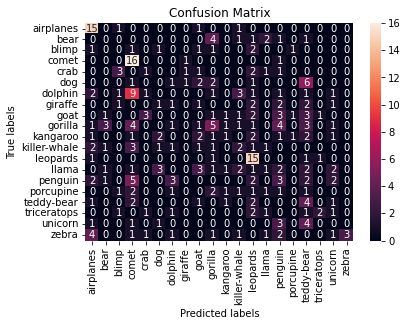

In [280]:
# Last model, y_pred_list[-1], is the PCA with 20 outputs.
# Plot confusion matrix and classification report.
cm = confusion_matrix(y_actuals_list[-1], y_pred_list[-1])
acc = accuracy_score(y_actuals_list[-1], y_pred_list[-1])
class_rep = classification_report(y_actuals_list[-1], y_pred_list[-1])
f1 = f1_score(y_actuals_list[-1], y_pred_list[-1], average='weighted')
print("F1 Score:", f1)
print("Accuracy:", acc)
print(class_rep)
basic_list_of_accs.append(f"{model_name}: {acc}")
print(basic_list_of_accs)

# Source: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
# Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
text_labels = list(train_classes_dict)
ax.xaxis.set_ticklabels(text_labels)
ax.yaxis.set_ticklabels(text_labels)

In [281]:
%%time
print('Resnet Feature Accuracy')
# get accuracy with different features
resnet_acc = []
for n in range(n_components):
  _, X = get_PCA([pixel_features], n_components=n+1)
  resnet_acc.append(train_classifier(X[0], np_train_classes, train_idx, val_idx, model_name))

Resnet Feature Accuracy
(1200, 1)
(1200, 2)
(1200, 3)
(1200, 4)
(1200, 5)
(1200, 6)
(1200, 7)
(1200, 8)
(1200, 9)
(1200, 10)
(1200, 11)
(1200, 12)
(1200, 13)
(1200, 14)
(1200, 15)
(1200, 16)
(1200, 17)
(1200, 18)
(1200, 19)
(1200, 20)
CPU times: user 6min 18s, sys: 2min 1s, total: 8min 20s
Wall time: 2min 27s


F1 Score: 0.20581788552497782
Accuracy: 0.25249169435215946
              precision    recall  f1-score   support

           0       0.64      0.89      0.74        18
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
           3       0.31      0.67      0.42        18
           4       0.27      0.40      0.32        10
           5       0.33      0.07      0.12        14
           6       0.00      0.00      0.00        21
           7       0.50      0.09      0.15        11
           8       0.20      0.06      0.09        17
           9       0.33      0.27      0.30        26
          10       0.50      0.07      0.12        15
          11       0.00      0.00      0.00        14
          12       0.20      0.84      0.32        19
          13       0.00      0.00      0.00        20
          14       0.21      0.20      0.21        20
          15       0.00      0.00      0.00        12
          16       0.

[Text(0, 0.5, 'airplanes'),
 Text(0, 1.5, 'bear'),
 Text(0, 2.5, 'blimp'),
 Text(0, 3.5, 'comet'),
 Text(0, 4.5, 'crab'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'dolphin'),
 Text(0, 7.5, 'giraffe'),
 Text(0, 8.5, 'goat'),
 Text(0, 9.5, 'gorilla'),
 Text(0, 10.5, 'kangaroo'),
 Text(0, 11.5, 'killer-whale'),
 Text(0, 12.5, 'leopards'),
 Text(0, 13.5, 'llama'),
 Text(0, 14.5, 'penguin'),
 Text(0, 15.5, 'porcupine'),
 Text(0, 16.5, 'teddy-bear'),
 Text(0, 17.5, 'triceratops'),
 Text(0, 18.5, 'unicorn'),
 Text(0, 19.5, 'zebra')]

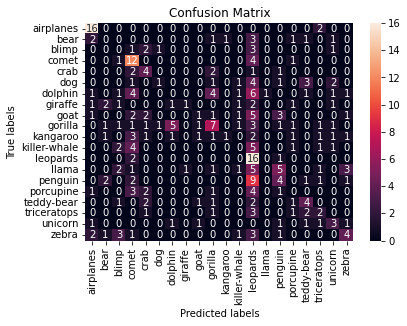

In [282]:
# Last model, y_pred_list[-1], is the PCA with 20 outputs.
# Plot confusion matrix and classification report.
cm = confusion_matrix(y_actuals_list[-1], y_pred_list[-1])
acc = accuracy_score(y_actuals_list[-1], y_pred_list[-1])
class_rep = classification_report(y_actuals_list[-1], y_pred_list[-1])
f1 = f1_score(y_actuals_list[-1], y_pred_list[-1], average='weighted')
print("F1 Score:", f1)
print("Accuracy:", acc)
print(class_rep)
basic_list_of_accs.append(f"{model_name}: {acc}")
print(basic_list_of_accs)

# Source: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
# Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
text_labels = list(train_classes_dict)
ax.xaxis.set_ticklabels(text_labels)
ax.yaxis.set_ticklabels(text_labels)

In [283]:
# Takes forever, do last.
%%time
print('Pixel Feature Accuracy')
# get accuracy with different features
pixel_acc = []
for n in range(n_components):
  _, X = get_PCA([pixel_features], n_components=n+1)
  pixel_acc.append(train_classifier(X[0], np_train_classes, train_idx, val_idx, model_name))

Pixel Feature Accuracy
(1200, 1)
(1200, 2)
(1200, 3)
(1200, 4)
(1200, 5)
(1200, 6)
(1200, 7)
(1200, 8)
(1200, 9)
(1200, 10)
(1200, 11)
(1200, 12)
(1200, 13)
(1200, 14)
(1200, 15)
(1200, 16)
(1200, 17)
(1200, 18)
(1200, 19)
(1200, 20)
CPU times: user 6min 17s, sys: 2min 5s, total: 8min 22s
Wall time: 2min 28s


F1 Score: 0.18581458339427875
Accuracy: 0.23588039867109634
              precision    recall  f1-score   support

           0       0.67      0.89      0.76        18
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
           3       0.38      0.61      0.47        18
           4       0.19      0.30      0.23        10
           5       0.00      0.00      0.00        14
           6       0.18      0.10      0.12        21
           7       0.33      0.09      0.14        11
           8       0.00      0.00      0.00        17
           9       0.26      0.27      0.26        26
          10       0.00      0.00      0.00        15
          11       0.12      0.07      0.09        14
          12       0.23      1.00      0.37        19
          13       0.00      0.00      0.00        20
          14       0.20      0.15      0.17        20
          15       0.00      0.00      0.00        12
          16       0.

[Text(0, 0.5, 'airplanes'),
 Text(0, 1.5, 'bear'),
 Text(0, 2.5, 'blimp'),
 Text(0, 3.5, 'comet'),
 Text(0, 4.5, 'crab'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'dolphin'),
 Text(0, 7.5, 'giraffe'),
 Text(0, 8.5, 'goat'),
 Text(0, 9.5, 'gorilla'),
 Text(0, 10.5, 'kangaroo'),
 Text(0, 11.5, 'killer-whale'),
 Text(0, 12.5, 'leopards'),
 Text(0, 13.5, 'llama'),
 Text(0, 14.5, 'penguin'),
 Text(0, 15.5, 'porcupine'),
 Text(0, 16.5, 'teddy-bear'),
 Text(0, 17.5, 'triceratops'),
 Text(0, 18.5, 'unicorn'),
 Text(0, 19.5, 'zebra')]

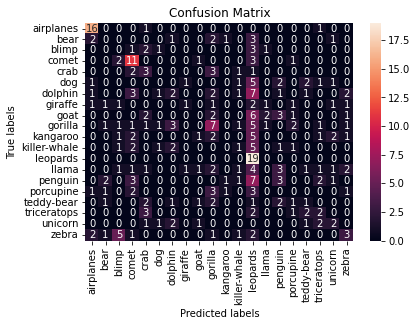

In [284]:
# Last model, y_pred_list[-1], is the PCA with 20 outputs.
# Plot confusion matrix and classification report.
cm = confusion_matrix(y_actuals_list[-1], y_pred_list[-1])
acc = accuracy_score(y_actuals_list[-1], y_pred_list[-1])
class_rep = classification_report(y_actuals_list[-1], y_pred_list[-1])
f1 = f1_score(y_actuals_list[-1], y_pred_list[-1], average='weighted')
print("F1 Score:", f1)
print("Accuracy:", acc)
print(class_rep)
basic_list_of_accs.append(f"{model_name}: {acc}")
print(basic_list_of_accs)

# Source: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
# Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
text_labels = list(train_classes_dict)
ax.xaxis.set_ticklabels(text_labels)
ax.yaxis.set_ticklabels(text_labels)

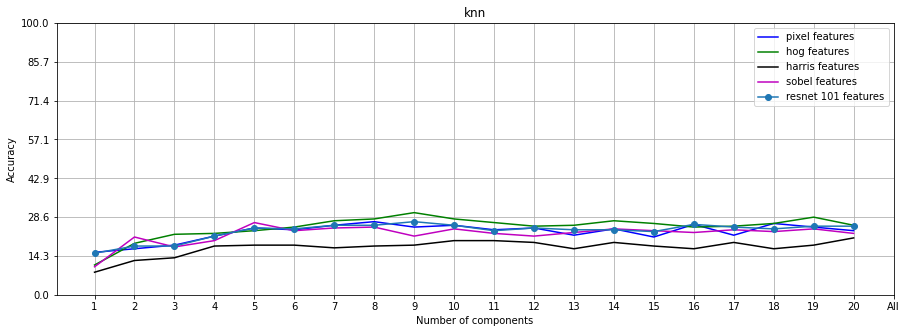

CPU times: user 178 ms, sys: 14 ms, total: 192 ms
Wall time: 183 ms


In [285]:
%%time
# plot the accuracy graph
plt.figure(figsize=(15,5))
plt.plot(np.array(pixel_acc)*100, 'b-', label='pixel features')
plt.plot(np.array(hog_acc)*100, 'g-', label='hog features')
plt.plot(np.array(harris_acc)*100, 'k-', label='harris features')
plt.plot(np.array(sobel_acc)*100, 'm-', label='sobel features')
plt.plot(np.array(resnet_acc)*100, 'o-', label='resnet 101 features')

xtick_labels = [f'{i+1}' for i in range(n_components)] + ['All']
plt.xticks(np.arange(n_components+1), labels=xtick_labels)
plt.yticks(np.linspace(0, 100, 8))
plt.grid(b=True)
plt.title(model_name)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.ylim([0, 100])
plt.legend()
plt.show()

## 3c. SVM

In [286]:
model_name = "svm"

In [287]:
%%time
print('HOG Feature Accuracy')
hog_acc = []
for n in range(n_components):
  _, X = get_PCA([hog_features], n_components=n+1)
  hog_acc.append(train_classifier(X[0], np_train_classes, train_idx, val_idx, model_name))

HOG Feature Accuracy
(1200, 1)
(1200, 2)
(1200, 3)
(1200, 4)
(1200, 5)
(1200, 6)
(1200, 7)
(1200, 8)
(1200, 9)
(1200, 10)
(1200, 11)
(1200, 12)
(1200, 13)
(1200, 14)
(1200, 15)
(1200, 16)
(1200, 17)
(1200, 18)
(1200, 19)
(1200, 20)
CPU times: user 1min 54s, sys: 13.6 s, total: 2min 8s
Wall time: 1min 51s


F1 Score: 0.28591625909253127
Accuracy: 0.3122923588039867
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.00      0.00      0.00        10
           2       0.08      0.12      0.10         8
           3       0.58      0.61      0.59        18
           4       0.20      0.20      0.20        10
           5       0.00      0.00      0.00        14
           6       0.27      0.19      0.22        21
           7       0.00      0.00      0.00        11
           8       0.18      0.12      0.14        17
           9       0.27      0.50      0.35        26
          10       0.33      0.27      0.30        15
          11       0.17      0.14      0.15        14
          12       0.56      0.95      0.71        19
          13       0.19      0.20      0.20        20
          14       0.28      0.40      0.33        20
          15       0.00      0.00      0.00        12
          16       0.2

[Text(0, 0.5, 'airplanes'),
 Text(0, 1.5, 'bear'),
 Text(0, 2.5, 'blimp'),
 Text(0, 3.5, 'comet'),
 Text(0, 4.5, 'crab'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'dolphin'),
 Text(0, 7.5, 'giraffe'),
 Text(0, 8.5, 'goat'),
 Text(0, 9.5, 'gorilla'),
 Text(0, 10.5, 'kangaroo'),
 Text(0, 11.5, 'killer-whale'),
 Text(0, 12.5, 'leopards'),
 Text(0, 13.5, 'llama'),
 Text(0, 14.5, 'penguin'),
 Text(0, 15.5, 'porcupine'),
 Text(0, 16.5, 'teddy-bear'),
 Text(0, 17.5, 'triceratops'),
 Text(0, 18.5, 'unicorn'),
 Text(0, 19.5, 'zebra')]

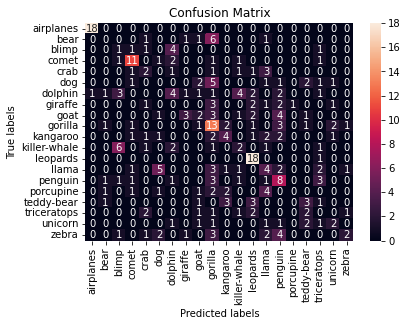

In [288]:
# Last model, y_pred_list[-1], is the PCA with 20 outputs.
# Plot confusion matrix and classification report.
cm = confusion_matrix(y_actuals_list[-1], y_pred_list[-1])
acc = accuracy_score(y_actuals_list[-1], y_pred_list[-1])
class_rep = classification_report(y_actuals_list[-1], y_pred_list[-1])
f1 = f1_score(y_actuals_list[-1], y_pred_list[-1], average='weighted')
print("F1 Score:", f1)
print("Accuracy:", acc)
print(class_rep)
basic_list_of_accs.append(f"{model_name}: {acc}")
print(basic_list_of_accs)

# Source: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
# Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
text_labels = list(train_classes_dict)
ax.xaxis.set_ticklabels(text_labels)
ax.yaxis.set_ticklabels(text_labels)

In [289]:
%%time
print('Harris Feature Accuracy')
harris_acc = []
for n in range(n_components):
  _, X = get_PCA([harris_features], n_components=n+1)
  harris_acc.append(train_classifier(X[0], np_train_classes, train_idx, val_idx, model_name))

Harris Feature Accuracy
(1200, 1)
(1200, 2)
(1200, 3)
(1200, 4)
(1200, 5)
(1200, 6)
(1200, 7)
(1200, 8)
(1200, 9)
(1200, 10)
(1200, 11)
(1200, 12)
(1200, 13)
(1200, 14)
(1200, 15)
(1200, 16)
(1200, 17)
(1200, 18)
(1200, 19)
(1200, 20)
CPU times: user 5min 2s, sys: 1min 37s, total: 6min 39s
Wall time: 3min 8s


F1 Score: 0.17225786871883478
Accuracy: 0.2159468438538206
              precision    recall  f1-score   support

           0       0.61      0.94      0.74        18
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
           3       0.27      0.83      0.41        18
           4       0.25      0.20      0.22        10
           5       0.00      0.00      0.00        14
           6       0.23      0.14      0.18        21
           7       0.23      0.27      0.25        11
           8       0.00      0.00      0.00        17
           9       0.11      0.23      0.15        26
          10       0.00      0.00      0.00        15
          11       0.00      0.00      0.00        14
          12       0.31      0.58      0.41        19
          13       0.60      0.15      0.24        20
          14       0.15      0.10      0.12        20
          15       0.00      0.00      0.00        12
          16       0.0

[Text(0, 0.5, 'airplanes'),
 Text(0, 1.5, 'bear'),
 Text(0, 2.5, 'blimp'),
 Text(0, 3.5, 'comet'),
 Text(0, 4.5, 'crab'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'dolphin'),
 Text(0, 7.5, 'giraffe'),
 Text(0, 8.5, 'goat'),
 Text(0, 9.5, 'gorilla'),
 Text(0, 10.5, 'kangaroo'),
 Text(0, 11.5, 'killer-whale'),
 Text(0, 12.5, 'leopards'),
 Text(0, 13.5, 'llama'),
 Text(0, 14.5, 'penguin'),
 Text(0, 15.5, 'porcupine'),
 Text(0, 16.5, 'teddy-bear'),
 Text(0, 17.5, 'triceratops'),
 Text(0, 18.5, 'unicorn'),
 Text(0, 19.5, 'zebra')]

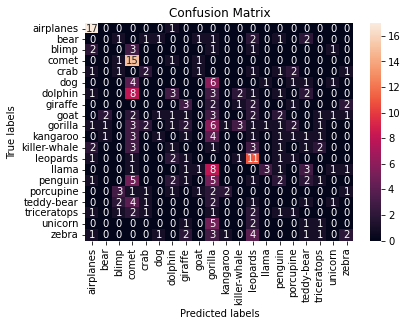

In [290]:
# Last model, y_pred_list[-1], is the PCA with 20 outputs.
# Plot confusion matrix and classification report.
cm = confusion_matrix(y_actuals_list[-1], y_pred_list[-1])
acc = accuracy_score(y_actuals_list[-1], y_pred_list[-1])
class_rep = classification_report(y_actuals_list[-1], y_pred_list[-1])
f1 = f1_score(y_actuals_list[-1], y_pred_list[-1], average='weighted')
print("F1 Score:", f1)
print("Accuracy:", acc)
print(class_rep)
basic_list_of_accs.append(f"{model_name}: {acc}")
print(basic_list_of_accs)

# Source: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
# Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
text_labels = list(train_classes_dict)
ax.xaxis.set_ticklabels(text_labels)
ax.yaxis.set_ticklabels(text_labels)

In [291]:
%%time
print('Sobel Feature Accuracy')
sobel_acc = []
for n in range(n_components):
  _, X = get_PCA([sobel_features], n_components=n+1)
  sobel_acc.append(train_classifier(X[0], np_train_classes, train_idx, val_idx, model_name))

Sobel Feature Accuracy
(1200, 1)
(1200, 2)
(1200, 3)
(1200, 4)
(1200, 5)
(1200, 6)
(1200, 7)
(1200, 8)
(1200, 9)
(1200, 10)
(1200, 11)
(1200, 12)
(1200, 13)
(1200, 14)
(1200, 15)
(1200, 16)
(1200, 17)
(1200, 18)
(1200, 19)
(1200, 20)
CPU times: user 7min 58s, sys: 1min 54s, total: 9min 52s
Wall time: 4min 9s


F1 Score: 0.1949647021719394
Accuracy: 0.2425249169435216
              precision    recall  f1-score   support

           0       0.55      0.89      0.68        18
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
           3       0.47      0.78      0.58        18
           4       0.12      0.10      0.11        10
           5       0.50      0.07      0.12        14
           6       0.09      0.05      0.06        21
           7       0.12      0.09      0.11        11
           8       0.00      0.00      0.00        17
           9       0.21      0.50      0.29        26
          10       0.14      0.07      0.09        15
          11       0.00      0.00      0.00        14
          12       0.34      0.68      0.46        19
          13       0.17      0.05      0.08        20
          14       0.11      0.20      0.14        20
          15       0.00      0.00      0.00        12
          16       0.20

[Text(0, 0.5, 'airplanes'),
 Text(0, 1.5, 'bear'),
 Text(0, 2.5, 'blimp'),
 Text(0, 3.5, 'comet'),
 Text(0, 4.5, 'crab'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'dolphin'),
 Text(0, 7.5, 'giraffe'),
 Text(0, 8.5, 'goat'),
 Text(0, 9.5, 'gorilla'),
 Text(0, 10.5, 'kangaroo'),
 Text(0, 11.5, 'killer-whale'),
 Text(0, 12.5, 'leopards'),
 Text(0, 13.5, 'llama'),
 Text(0, 14.5, 'penguin'),
 Text(0, 15.5, 'porcupine'),
 Text(0, 16.5, 'teddy-bear'),
 Text(0, 17.5, 'triceratops'),
 Text(0, 18.5, 'unicorn'),
 Text(0, 19.5, 'zebra')]

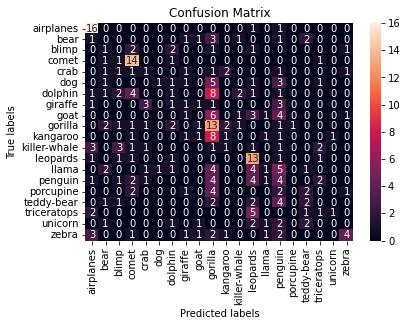

In [292]:
# Last model, y_pred_list[-1], is the PCA with 20 outputs.
# Plot confusion matrix and classification report.
cm = confusion_matrix(y_actuals_list[-1], y_pred_list[-1])
acc = accuracy_score(y_actuals_list[-1], y_pred_list[-1])
class_rep = classification_report(y_actuals_list[-1], y_pred_list[-1])
f1 = f1_score(y_actuals_list[-1], y_pred_list[-1], average='weighted')
print("F1 Score:", f1)
print("Accuracy:", acc)
print(class_rep)
basic_list_of_accs.append(f"{model_name}: {acc}")
print(basic_list_of_accs)

# Source: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
# Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
text_labels = list(train_classes_dict)
ax.xaxis.set_ticklabels(text_labels)
ax.yaxis.set_ticklabels(text_labels)

In [293]:
%%time
print('Resnet Feature Accuracy')
# get accuracy with different features
resnet_acc = []
for n in range(n_components):
  _, X = get_PCA([pixel_features], n_components=n+1)
  resnet_acc.append(train_classifier(X[0], np_train_classes, train_idx, val_idx, model_name))

Resnet Feature Accuracy
(1200, 1)
(1200, 2)
(1200, 3)
(1200, 4)
(1200, 5)
(1200, 6)
(1200, 7)
(1200, 8)
(1200, 9)
(1200, 10)
(1200, 11)
(1200, 12)
(1200, 13)
(1200, 14)
(1200, 15)
(1200, 16)
(1200, 17)
(1200, 18)
(1200, 19)
(1200, 20)
CPU times: user 8min, sys: 1min 52s, total: 9min 52s
Wall time: 4min 10s


F1 Score: 0.12856378838019097
Accuracy: 0.21262458471760798
              precision    recall  f1-score   support

           0       0.63      0.94      0.76        18
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00        21
           7       0.00      0.00      0.00        11
           8       0.17      0.06      0.09        17
           9       0.21      0.69      0.32        26
          10       0.00      0.00      0.00        15
          11       0.00      0.00      0.00        14
          12       0.19      1.00      0.32        19
          13       0.00      0.00      0.00        20
          14       0.09      0.20      0.12        20
          15       0.00      0.00      0.00        12
          16       1.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0, 0.5, 'airplanes'),
 Text(0, 1.5, 'bear'),
 Text(0, 2.5, 'blimp'),
 Text(0, 3.5, 'comet'),
 Text(0, 4.5, 'crab'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'dolphin'),
 Text(0, 7.5, 'giraffe'),
 Text(0, 8.5, 'goat'),
 Text(0, 9.5, 'gorilla'),
 Text(0, 10.5, 'kangaroo'),
 Text(0, 11.5, 'killer-whale'),
 Text(0, 12.5, 'leopards'),
 Text(0, 13.5, 'llama'),
 Text(0, 14.5, 'penguin'),
 Text(0, 15.5, 'porcupine'),
 Text(0, 16.5, 'teddy-bear'),
 Text(0, 17.5, 'triceratops'),
 Text(0, 18.5, 'unicorn'),
 Text(0, 19.5, 'zebra')]

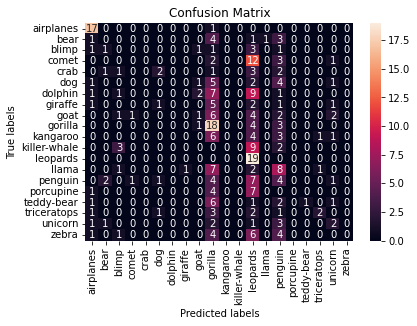

In [294]:
# Last model, y_pred_list[-1], is the PCA with 20 outputs.
# Plot confusion matrix and classification report.
cm = confusion_matrix(y_actuals_list[-1], y_pred_list[-1])
acc = accuracy_score(y_actuals_list[-1], y_pred_list[-1])
class_rep = classification_report(y_actuals_list[-1], y_pred_list[-1])
f1 = f1_score(y_actuals_list[-1], y_pred_list[-1], average='weighted')
print("F1 Score:", f1)
print("Accuracy:", acc)
print(class_rep)
basic_list_of_accs.append(f"{model_name}: {acc}")
print(basic_list_of_accs)

# Source: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
# Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
text_labels = list(train_classes_dict)
ax.xaxis.set_ticklabels(text_labels)
ax.yaxis.set_ticklabels(text_labels)

In [295]:
# Takes forever, do last.
%%time
print('Pixel Feature Accuracy')
# get accuracy with different features
pixel_acc = []
for n in range(n_components):
  _, X = get_PCA([pixel_features], n_components=n+1)
  pixel_acc.append(train_classifier(X[0], np_train_classes, train_idx, val_idx, model_name))

Pixel Feature Accuracy
(1200, 1)
(1200, 2)
(1200, 3)
(1200, 4)
(1200, 5)
(1200, 6)
(1200, 7)
(1200, 8)
(1200, 9)
(1200, 10)
(1200, 11)
(1200, 12)
(1200, 13)
(1200, 14)
(1200, 15)
(1200, 16)
(1200, 17)
(1200, 18)
(1200, 19)
(1200, 20)
CPU times: user 8min 2s, sys: 1min 52s, total: 9min 55s
Wall time: 4min 12s


F1 Score: 0.24817986852661192
Accuracy: 0.2757475083056478
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        18
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
           3       0.58      0.61      0.59        18
           4       0.25      0.20      0.22        10
           5       0.14      0.14      0.14        14
           6       0.11      0.05      0.07        21
           7       0.00      0.00      0.00        11
           8       0.08      0.06      0.07        17
           9       0.23      0.58      0.33        26
          10       0.00      0.00      0.00        15
          11       0.43      0.21      0.29        14
          12       0.50      0.84      0.63        19
          13       0.11      0.10      0.10        20
          14       0.17      0.25      0.20        20
          15       0.00      0.00      0.00        12
          16       0.4

[Text(0, 0.5, 'airplanes'),
 Text(0, 1.5, 'bear'),
 Text(0, 2.5, 'blimp'),
 Text(0, 3.5, 'comet'),
 Text(0, 4.5, 'crab'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'dolphin'),
 Text(0, 7.5, 'giraffe'),
 Text(0, 8.5, 'goat'),
 Text(0, 9.5, 'gorilla'),
 Text(0, 10.5, 'kangaroo'),
 Text(0, 11.5, 'killer-whale'),
 Text(0, 12.5, 'leopards'),
 Text(0, 13.5, 'llama'),
 Text(0, 14.5, 'penguin'),
 Text(0, 15.5, 'porcupine'),
 Text(0, 16.5, 'teddy-bear'),
 Text(0, 17.5, 'triceratops'),
 Text(0, 18.5, 'unicorn'),
 Text(0, 19.5, 'zebra')]

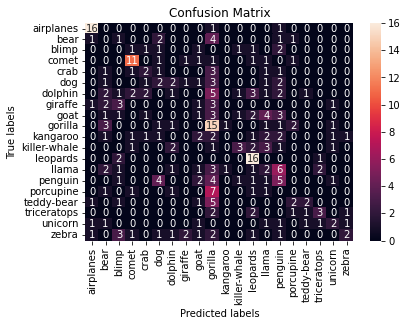

In [296]:
# Last model, y_pred_list[-1], is the PCA with 20 outputs.
# Plot confusion matrix and classification report.
cm = confusion_matrix(y_actuals_list[-1], y_pred_list[-1])
acc = accuracy_score(y_actuals_list[-1], y_pred_list[-1])
class_rep = classification_report(y_actuals_list[-1], y_pred_list[-1])
f1 = f1_score(y_actuals_list[-1], y_pred_list[-1], average='weighted')
print("F1 Score:", f1)
print("Accuracy:", acc)
print(class_rep)
basic_list_of_accs.append(f"{model_name}: {acc}")
print(basic_list_of_accs)

# Source: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
# Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
text_labels = list(train_classes_dict)
ax.xaxis.set_ticklabels(text_labels)
ax.yaxis.set_ticklabels(text_labels)

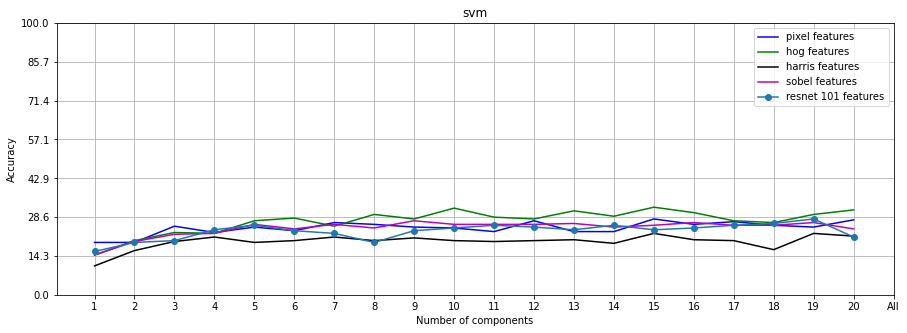

CPU times: user 176 ms, sys: 9.33 ms, total: 186 ms
Wall time: 182 ms


In [297]:
%%time
# plot the accuracy graph
plt.figure(figsize=(15,5))
plt.plot(np.array(pixel_acc)*100, 'b-', label='pixel features')
plt.plot(np.array(hog_acc)*100, 'g-', label='hog features')
plt.plot(np.array(harris_acc)*100, 'k-', label='harris features')
plt.plot(np.array(sobel_acc)*100, 'm-', label='sobel features')
plt.plot(np.array(resnet_acc)*100, 'o-', label='resnet 101 features')

xtick_labels = [f'{i+1}' for i in range(n_components)] + ['All']
plt.xticks(np.arange(n_components+1), labels=xtick_labels)
plt.yticks(np.linspace(0, 100, 8))
plt.grid(b=True)
plt.title(model_name)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.ylim([0, 100])
plt.legend()
plt.show()

In [298]:
print(basic_list_of_accs)

['logistic_regression: 0.2724252491694352', 'logistic_regression: 0.19269102990033224', 'logistic_regression: 0.22591362126245848', 'logistic_regression: 0.2026578073089701', 'logistic_regression: 0.2026578073089701', 'knn: 0.2558139534883721', 'knn: 0.20930232558139536', 'knn: 0.22591362126245848', 'knn: 0.25249169435215946', 'knn: 0.23588039867109634', 'svm: 0.3122923588039867', 'svm: 0.2159468438538206', 'svm: 0.2425249169435216', 'svm: 0.21262458471760798', 'svm: 0.2757475083056478']


# 4. Pick best performing model w best performing features

- Run on Test Set Folder
- Output CSV of y_preds and y_labels 

## Extract "model" from the function so that you can do model.predict



In [299]:
# for the best model, train it on the training set for 20 components only
n_components = 20
input_path = Path.cwd() / "Preprocessed_Images_v2"

train_idx, val_idx = train_test_split(np.arange(len(sorted(list(input_path.glob('*/[!.]*.jpg'))))), test_size=0.20, random_state=42)

In [300]:
# Insert name of Best performing features: Hog
_, X = get_PCA([hog_features], n_components=20)

In [301]:
# Maps the previous for loop into 1 pass only.
  # def train_classifier(in_feat, in_y, in_train_idx, val_idx, model)
  # train_classifier(X[0], np_train_classes, train_idx, val_idx, model_name)
in_feat = X[0]
in_y = np_train_classes
in_train_idx = train_idx
val_idx = val_idx

In [302]:
# get the train and validation split
X_train = in_feat[in_train_idx, :].copy()
print(X_train.shape)
y_train = in_y[in_train_idx].copy()
X_val = in_feat[val_idx, :].copy()
y_val = in_y[val_idx].copy()

# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

(1200, 20)


In [303]:
# Insert code initializing the best performing model: SVM

%%time
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.0001],
              'kernel': ['rbf', 'sigmoid']}
best_model = RandomizedSearchCV(SVC(), param_grid, refit = True)
best_model = best_model.fit(X_train, y_train)

CPU times: user 6.52 s, sys: 199 ms, total: 6.72 s
Wall time: 6.45 s


## Validation folder

In [304]:
# Go to validation folder
input_path = Path.cwd() / "20_Validation"
print(input_path)

/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/20_Validation


In [305]:
# Length of images in validation folder
print(len(list(input_path.glob('*.jpg'))))

716


Input Path: /content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/20_Validation
Output Parent Path: /content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Validation_Imgs
hi, I'm a file: /content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/20_Validation/validation_pic (1).jpg
hi, I'm a file: /content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/20_Validation/validation_pic (10).jpg
hi, I'm a file: /content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/20_Validation/validation_pic (100).jpg
hi, I'm a file: /content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/20_Validation/validation_pic (101).jpg
hi, I'm a file: /content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/

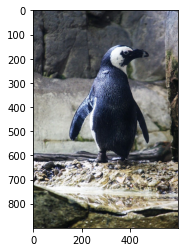

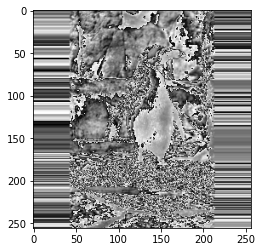

In [306]:
# Preprocess all images in Validation folder

%%time 
# 
# Source: https://discuss.pytorch.org/t/how-to-save-image/48808/4
# Source: https://stackoverflow.com/questions/3925096/how-to-get-only-the-last-part-of-a-path-in-python
# Source: https://towardsdatascience.com/dont-use-python-os-library-any-more-when-pathlib-can-do-141fefb6bdb5
# Source: https://stackoverflow.com/questions/28348309/in-python-how-should-one-extract-the-second-last-directory-name-in-a-path
# Source: https://stackoverflow.com/questions/59218671/runtimeerror-output-with-shape-1-224-224-doesnt-match-the-broadcast-shape

train_imgs_parent_dir = input_path
print("Input Path:", train_imgs_parent_dir)

destination = Path.cwd() / "Preprocessed_Validation_Imgs"
print("Output Parent Path:", destination)
Path(destination).mkdir(exist_ok=True)

for path_object in sorted(train_imgs_parent_dir.glob('**/*')):
    if path_object.is_file():
        print(f"hi, I'm a file: {path_object}")
        image_name_only = pathlib.PurePath(path_object).name
        subfolder_name_only = os.path.split(os.path.split(path_object)[0])[1]
        
        # (Path -> PIL)
        # If image = grayscale (2 channels), convert it to RGB (3 channels) 
        # Color
        pil_image = Image.open(str(path_object)).convert('RGB')
        # Grayscale
        # pil_image = Image.open(str(path_object)).convert('L')

        # Show 1st Original image only (PIL -> PIL)
        if str(path_object) == "/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/20_Validation/validation_pic (1).jpg":
          plt.imshow(pil_image, "gray")
        
        # Preprocess image (PIL -> Tensor)
        tensor_img = preprocess(pil_image)
        
        # Show 1st Postprocess image only (Tensor -> PIL)
        if str(path_object) == "/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/20_Validation/validation_pic (1).jpg":
          show(tensor_img)

        # Save image (Tensor -> JPEG)
        save_image(tensor_img, destination / image_name_only)
        # save_image(tensor_img, destination / subfolder_name_only / image_name_only)
        
    elif path_object.is_dir():
        print(f"hi, I'm a dir: {path_object}")
        subfolder_name_only = pathlib.PurePath(path_object).name
        Path(destination / subfolder_name_only).mkdir(exist_ok=True)

/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Validation_Imgs
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Validation_Imgs/validation_pic (1).jpg


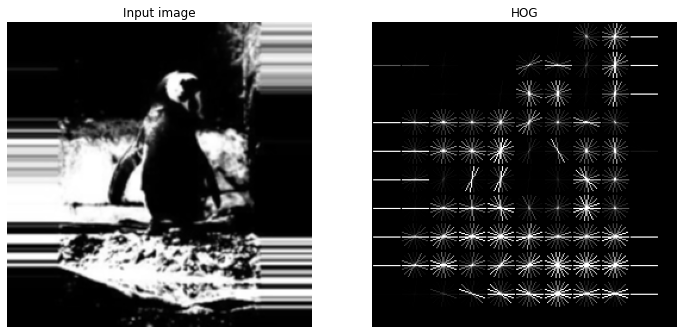

/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Validation_Imgs/validation_pic (10).jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Validation_Imgs/validation_pic (100).jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Validation_Imgs/validation_pic (101).jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Validation_Imgs/validation_pic (102).jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Validation_Imgs/validation_pic (103).jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Validation_Imgs/validation_pic (104).jpg
/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3

In [307]:
%%time
# Run Hog on Validation Folder to extract features

input_path = Path.cwd() / "Preprocessed_Validation_Imgs"
print(input_path)

out_feat = []

for i in sorted(input_path.glob('*.jpg')):
  print(i)
  im = cv2.imread(str(i))
  
  # Convert to graycsale
  gr = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 
  # Blur the image for better edge detection
  gr = cv2.GaussianBlur(gr, (3,3), sigmaX=0, sigmaY=0)
  image = gr

  # From source above
  # fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
  #                     cells_per_block=(1,1), visualize=True)
  # From class
  # fd, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8), 
                            # cells_per_block=(2, 2), visualize=True, multichannel=False)
  # Tweaked
  fd, hog_image = hog(image, orientations=9, pixels_per_cell=(24,24),
                      cells_per_block=(1,1), visualize=True)

  # Append to feature list
  out_feat.append(fd[np.newaxis, :])

  #-----------------------------------
  if str(i) == "/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Validation_Imgs/validation_pic (1).jpg":
    # Print 1 only becuase Buffered data was truncated after reaching the output size limit.
    fig, ax = plt.subplots(1, 2, figsize=(12, 12), sharex=True, sharey=True)

    ax[0].axis('off')
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].set_adjustable('box')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    # hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

    ax[1].axis('off')
    ax[1].imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax[1].set_title('HOG')
    ax[1].set_adjustable('box')
    plt.show()
    # break;

In [308]:
test_features = np.vstack(out_feat)
print(test_features.shape)

(716, 900)


In [309]:
# Generate Y Preds!

# Insert name of Best performing features: Sobel
_, X = get_PCA([test_features], n_components=20)

# Jackpot
in_feat = X[0]

# what is in_feat and val_idx
X_val = in_feat[:, :].copy()
# X_val = in_feat[val_idx, :].copy()

# Pick one
scaler = StandardScaler()
X_val = scaler.fit_transform(X_val)
# X_val = scaler.transform(X_val)

# Trace X_val backwards
y_pred = best_model.predict(X_val)


In [310]:
column1 = np.array(range(len(list(input_path.glob('*.jpg')))))
print(column1)
print(type(column1))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [311]:
column2 = y_pred
print(len(column2))
print(type(column2))
print(column2)

716
<class 'numpy.ndarray'>
[ 2  0 14 17  9  9 13 14  9  9  9 17  9 14  9  8 18 14  9  9 12 14  3 14
 13 12 17  9 13 14  7  9  4 10 14 12  9  9 12 12  9  9  2  9  9  9  9 12
  9  9  4 18 14  9  9 12 12  9  9  9  9 17  9  9  8 12  4  9 14 16  9  9
 14 14 16  9  9  9  9  9 15 16 18  9  9  9  9  9  9  9 17 14  9  9  9 14
  9  9  9  9  6  9  9 13  5  9  9  9  6 12 19  9  9  4 12  9 12  8  9  9
 13  9  5  9 17 13 13 12 13  9 14 12 13  5  6  9  4 13 13  4  9  9 14 12
 13  9 12  9 12  6  9 16 12  9 14 12 14 18  9  9  9  9 17  9  9 16  9  9
 14  9  9  9  9  1  9 13  9 18  9  5  9 18  9  9 14  9  9 13  9  9  9  9
 12  1  9  9  9  9  9 13  9  9  9 13  9  9  9 17  9 11 17  2 18  9  9  9
  3  6  3  3  3  0 14  9  0  3  0  3  0  9  6 12  9 14  9 12  4 12 16  1
  9  8  9  9 12  9  9 17  5  9  2 13  9  9  9 12  0 13 14  9 14 14  9 14
  9  9 16  9  9  9  9  9  9  9  9  9 14  9  9 14  9  9 16  9 12  9  9 11
  9  9  9  9 18  9 13 14  9  9  9 18  9  9 14  9  9  9  9  9  9 17 16  2
  9  9 12 12 16  9  9 1

In [312]:
# Write 2 lists to CSV
# Source: https://stackoverflow.com/questions/19302612/how-to-write-data-from-two-lists-into-columns-in-a-csv
# Source: https://www.quora.com/How-do-you-write-two-lists-to-two-different-columns-in-a-CSV-file-in-Python-Python-list-CSV-development
import pandas as pd

list_dict = {'image_id': column1, 'y_preds': column2}
df = pd.DataFrame(list_dict)
df.to_csv('prediction_results.csv', index=False) 

# [Archive] ALL Previous Iterations and Experiments

## [Archive] Graph ROC Curves

In [ ]:
# predict probabilities for X_test using predict_proba
probabilities = svm.predict_proba(X_test)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

## [Archive] Old Standalone CNN

### Assign image arrays into x_train and x_val

In [ ]:
# From Preproecessing v2 above
img_height = 250
img_width = 250
batch_size = 32
# Source: https://www.sciencedirect.com/science/article/pii/S2405959519303455#:~:text=In%20practical%20terms%2C%20to%20determine,advantage%20of%20the%20GPUs%20processing.

In [ ]:
input_path = Path.cwd() / "Preprocessed_Images_v2"
print(input_path)

/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2


In [ ]:
# Source: https://medium.com/analytics-vidhya/image-classification-with-tf-keras-introductory-tutorial-7e0ebb73d044
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    input_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size = (img_height, img_width),
    batch_size=batch_size
)

Found 1501 files belonging to 20 classes.
Using 1201 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    input_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
    )

Found 1501 files belonging to 20 classes.
Using 300 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['airplanes', 'bear', 'blimp', 'comet', 'crab', 'dog', 'dolphin', 'giraffe', 'goat', 'gorilla', 'kangaroo', 'killer-whale', 'leopards', 'llama', 'penguin', 'porcupine', 'teddy-bear', 'triceratops', 'unicorn', 'zebra']
20


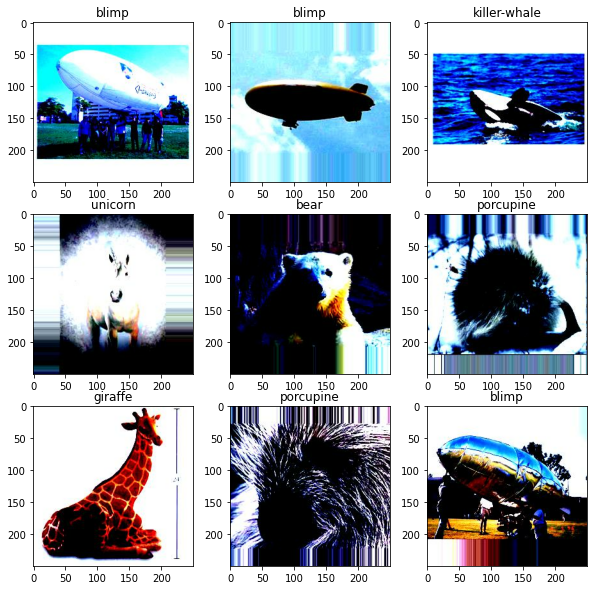

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis("on")

### Initiate CNN Model

In [ ]:
AUTOTUNE= tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size= AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size= AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
num_classes = len(class_names)

# Source: https://rescale.com/neural-networks-using-keras-on-rescale/
# Source: https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                    layers.Conv2D(16, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)

])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics= ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 250, 250, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 250, 250, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 125, 125, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 64)       

In [ ]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=epochs
)

Epoch 1/10
38/38 [==============================] - 13s 70ms/step - loss: 2.8561 - accuracy: 0.1774 - val_loss: 2.5404 - val_accuracy: 0.2500
Epoch 2/10
38/38 [==============================] - 1s 26ms/step - loss: 2.1717 - accuracy: 0.3680 - val_loss: 2.1937 - val_accuracy: 0.3267
Epoch 3/10
38/38 [==============================] - 1s 26ms/step - loss: 1.4856 - accuracy: 0.5445 - val_loss: 2.2657 - val_accuracy: 0.3133
Epoch 4/10
38/38 [==============================] - 1s 26ms/step - loss: 0.5711 - accuracy: 0.8435 - val_loss: 3.1241 - val_accuracy: 0.3333
Epoch 5/10
38/38 [==============================] - 1s 26ms/step - loss: 0.2115 - accuracy: 0.9442 - val_loss: 3.7770 - val_accuracy: 0.3267
Epoch 6/10
38/38 [==============================] - 1s 26ms/step - loss: 0.0882 - accuracy: 0.9775 - val_loss: 3.7823 - val_accuracy: 0.3167
Epoch 7/10
38/38 [==============================] - 1s 26ms/step - loss: 0.0373 - accuracy: 0.9908 - val_loss: 4.2603 - val_accuracy: 0.3300
Epoch 8/10
3

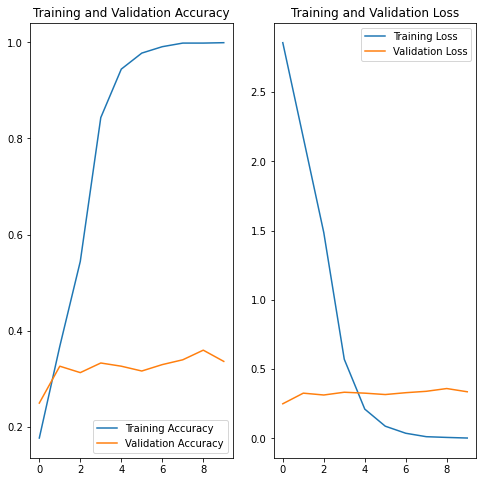

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_accuracy']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Augmentation by flipping, rotating, and zooming for CNN model to learn better

In [ ]:
data_augmentation = keras.Sequential(
    [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)]
)

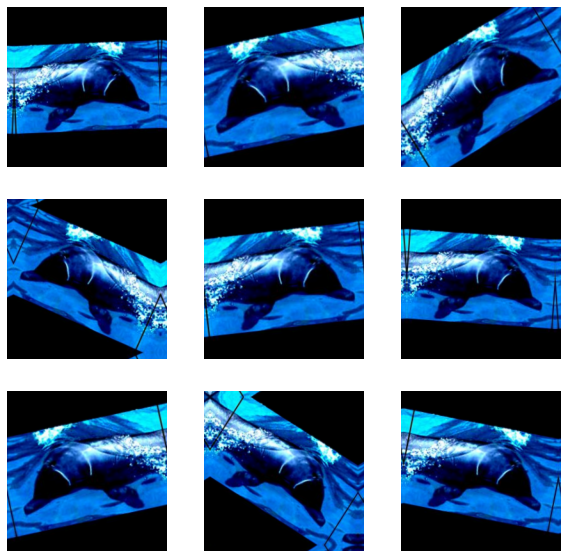

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
38/38 [==============================] - 2s 34ms/step - loss: 2.9949 - accuracy: 0.1682 - val_loss: 2.6465 - val_accuracy: 0.2067
Epoch 2/20
38/38 [==============================] - 1s 31ms/step - loss: 2.4844 - accuracy: 0.2698 - val_loss: 2.3860 - val_accuracy: 0.2567
Epoch 3/20
38/38 [==============================] - 1s 31ms/step - loss: 2.2768 - accuracy: 0.3306 - val_loss: 2.3691 - val_accuracy: 0.2733
Epoch 4/20
38/38 [==============================] - 1s 31ms/step - loss: 2.0980 - accuracy: 0.3622 - val_loss: 2.2258 - val_accuracy: 0.3467
Epoch 5/20
38/38 [==============================] - 1s 31ms/step - loss: 1.9834 - accuracy: 0.4147 - val_loss: 2.2379 - val_accuracy: 0.3267
Epoch 6/20
38/38 [==============================] - 1s 31ms/step - loss: 1.8278 - accuracy: 0.4530 - val_loss: 2.2300 - val_accuracy: 0.3700
Epoch 7/20
38/38 [==============================] - 1s 31ms/step - loss: 1.7202 - accuracy: 0.4688 - val_loss: 2.1335 - val_accuracy: 0.3833
Epoch 8/20
38

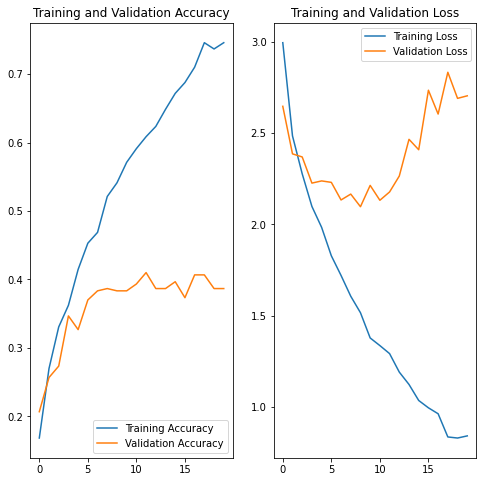

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Test on the Validation Set

In [ ]:
# Source: https://www.projectpro.io/recipes/evaluate-keras-model
score = model.evaluate(val_ds, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.7039453983306885
Test accuracy: 0.3866666555404663


## [Archive] CNN

In [ ]:
model_name = "cnn"

In [ ]:
%%time
print('HOG Feature Accuracy')
hog_acc = []
for n in range(n_components):
  _, X = get_PCA([hog_features], n_components=n+1)
  hog_acc.append(train_classifier(X[0], np_train_classes, train_idx, val_idx, model_name))

HOG Feature Accuracy
(1200, 1)
Epoch 1/10


ValueError: ignored

In [ ]:
%%time
print('Sobel Feature Accuracy')
sobel_acc = []
for n in range(n_components):
  _, X = get_PCA([sobel_features], n_components=n+1)
  sobel_acc.append(train_classifier(X[0], np_train_classes, train_idx, val_idx, model_name))

Sobel Feature Accuracy
(1200, 1)
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.129 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.158 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.138 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.175 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.125 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.104 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.113 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.113 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.138 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.113 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.096 total time=   0.1s
[CV 2/5] END .

In [ ]:
%%time
print('Harris Feature Accuracy')
harris_acc = []
for n in range(n_components):
  _, X = get_PCA([harris_features], n_components=n+1)
  harris_acc.append(train_classifier(X[0], np_train_classes, train_idx, val_idx, model_name))

Harris Feature Accuracy
(1200, 1)
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.129 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.096 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.125 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.104 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.113 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.096 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.096 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.096 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.096 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.096 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.096 total time=   0.1s
[CV 2/5] END 

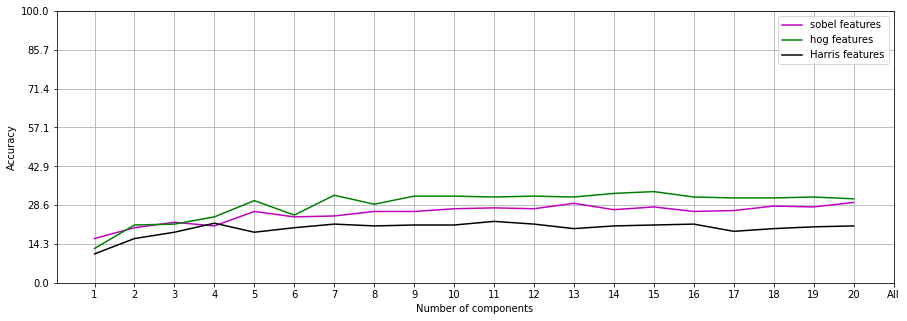

CPU times: user 339 ms, sys: 30 ms, total: 369 ms
Wall time: 365 ms


In [ ]:
%%time
# plot the accuracy graph
plt.figure(figsize=(15,5))
# plt.plot(np.array(pixel_acc)*100, 'b-', label='pixel features')
plt.plot(np.array(sobel_acc)*100, 'm-', label='sobel features')
plt.plot(np.array(hog_acc)*100, 'g-', label='hog features')
plt.plot(np.array(harris_acc)*100, 'k-', label='Harris features')

xtick_labels = [f'{i+1}' for i in range(n_components)] + ['All']
plt.xticks(np.arange(n_components+1), labels=xtick_labels)
plt.yticks(np.linspace(0, 100, 8))
plt.grid(b=True)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.ylim([0, 100])
plt.legend()
plt.show()

## [Archive] Canny Edge Detector - Feature extraction

In [ ]:
# Source: https://learnopencv.com/edge-detection-using-opencv/
input_path = Path.cwd() / "Preprocessed_Images_v2"
print(input_path)

out_feat = []

for i in input_path.glob('*/[!.]*.jpg'):
  print(i)
  im = cv2.imread(str(i))

  # Convert to graycsale
  img_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 

  # Blur the image for better edge detection
  img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
  
  image = img_blur

  # From class
  canny_image = cv2.Canny(image=image, threshold1=100, threshold2=200)
  out_feat.append(canny_image.flatten()[np.newaxis, :])

  # Buffered data was truncated after reaching the output size limit.
  # fig, ax = plt.subplots(1, 2, figsize=(5, 5), sharex=True, sharey=True)

  # ax[0].axis('off')
  # ax[0].imshow(image, cmap=plt.cm.gray)
  # ax[0].set_title('Input image')
  # ax[0].set_adjustable('box')

  # ax[1].axis('off')
  # ax[1].imshow(canny_image, cmap=plt.cm.gray)
  # ax[1].set_title('Canny Edges')
  # ax[1].set_adjustable('box')

  # plt.show()
  # break;

In [ ]:
canny_features = np.vstack(out_feat)
print(canny_features.shape)

(1501, 50176)


## [Archive] Initial Attempt at Resizing Images into Square

In [ ]:
input_path = Path.cwd() / "Preprocessed_Images_v2"
print(input_path)

/content/gdrive/.shortcut-targets-by-id/1M3xg5Xo57fCXEDV5i3K_QDUSEugt1m6E/W281/final-project-LifeGains/Preprocessed_Images_v2


In [ ]:
# Find the max and min height and width of all images in many folders
# Source: https://stackoverflow.com/questions/3529552/find-the-largest-image-dimensions-from-list-of-images

all_img_sizes = []

for f in list(input_path.glob('*/[!.]*.jpg')):
  all_img_sizes.append(Image.open(f, 'r').size)

In [ ]:
print(all_img_sizes)

print(np.mean(all_img_sizes, axis=0))
print(np.max(all_img_sizes, axis=0))
print(np.min(all_img_sizes, axis=0))

average_width = round(np.mean(all_img_sizes, axis=0)[0])
average_height = round(np.mean(all_img_sizes, axis=0)[1])

[(224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (22

In [ ]:
# Resize all pictures with aspect ratios intact
# Source: https://www.holisticseo.digital/python-seo/resize-image/
# Source: https://stackoverflow.com/questions/31434278/how-do-i-use-python-pil-to-save-an-image-to-a-particular-directory
# Source: https://stackoverflow.com/questions/62161851/how-to-iterate-over-directories-and-subdirectories-that-contain-images-and-save
# Source: https://stackoverflow.com/questions/5254445/how-to-add-a-string-in-a-certain-position
# Source: https://www.codegrepper.com/code-examples/python/save+image+to+path+in+python+PIl
# Source: https://stackoverflow.com/questions/1945920/why-doesnt-os-path-join-work-in-this-case

input_path = Path.cwd() / "Reduced_PCAed_images"
destination = Path.cwd() / "Resized_Images"
print("Output Parent Path:", destination)
Path(destination).mkdir(exist_ok=True)
print("Input Path:", input_path)

fixed_width = average_width
fixed_height = average_height
new_width_height_list = []

for path_object in input_path.glob('**/*'):
    if path_object.is_file():
        print(f"hi, I'm a file: {path_object}")
        image_name_only = pathlib.PurePath(path_object).name
        subfolder_name_only = os.path.split(os.path.split(path_object)[0])[1]
        opened_img = Image.open(path_object)

        # Adjust width        
        width_percent = (fixed_width / float(opened_img.size[0]))
        height_size = int((float(opened_img.size[1]) * float(width_percent)))
        print((fixed_width, height_size))
        img2 = opened_img.resize((fixed_width, height_size), PIL.Image.NEAREST)
        new_width_height_list.append((fixed_width, height_size))

        # Adjust height
        # height_percent = (fixed_height / float(opened_img.size[1]))
        # width_size = int((float(opened_img.size[0]) * float(height_percent)))
        # print((width_size, fixed_height))
        # img2 = opened_img.resize((width_size, fixed_height), PIL.Image.NEAREST)
        # new_width_height_list.append((width_size, fixed_height))

        img2.save(destination / subfolder_name_only / image_name_only)
    elif path_object.is_dir():
        print(f"hi, I'm a dir: {path_object}")
        subfolder_name_only = pathlib.PurePath(path_object).name
        Path(destination / subfolder_name_only).mkdir(exist_ok=True)

In [ ]:
print(np.mean(new_width_height_list, axis=0))
print(np.max(new_width_height_list, axis=0))
print(np.min(new_width_height_list, axis=0))

[403.         355.88207861]
[403 767]
[403 116]


In [ ]:
print(np.max(new_width_height_list, axis=0)[1])

767


- After fixing the height amount, the max width of all the images after the transformations above is 1179 [1179  340]
- After fixing the width amount, the max height of all the images after the transformations above is 767 [403 767]

- Since we need the images to be square, we will pad all images up to the max dimension. Since 767 < 1179, we will opt with adjusting the width amount to a fixed width and pad to the max height of 767, since doing vice versa will require more padding (and therefore more memory usage).

In [ ]:
pip install python-resize-image

In [ ]:
# Resize rectangular images to square, keeping ratio and fill background with black
# Source: https://stackoverflow.com/questions/26649716/how-to-show-pil-image-in-ipython-notebook
# Source: # Source: https://stackoverflow.com/questions/44231209/resize-rectangular-image-to-square-keeping-ratio-and-fill-background-with-black
input_path = Path.cwd() / "Resized_Images"

for i in input_path.glob('*/[!.]*.jpg'):
  print(i)
  #Reading an image (you can use PNG or JPG)
  img = cv2.imread(str(i))

  if int(img.shape[0]) > 403:
    # Adjust height
    # Source: https://datascience.stackexchange.com/questions/48946/typeerror-tuple-object-cannot-be-interpreted-as-an-integer
    img = cv2.resize(img, (fixed_width, fixed_width))
    print(img.shape)
  
  s = 403
  # Max size should be 767, aka max width from above.
  # 42% accuracy so we are not using this method.
  # s = np.max(new_width_height_list, axis=0)[1]
  # Getting the bigger side of the image
  # s = max(img.shape[0:2])

  #Creating a dark square with NUMPY  
  f = np.zeros((s,s,3),np.uint8)

  #Getting the centering position
  ax,ay = (s - img.shape[1])//2,(s - img.shape[0])//2

  #Pasting the 'image' in a centering position
  f[ay:img.shape[0]+ay,ax:ax+img.shape[1]] = img

  #Showing results (just in case) 
  print(f.shape)
  cv2_imshow(f)

  #Saving the image
  destination = Path.cwd() / "Resized_Images"
  image_name_only = pathlib.PurePath(i).name
  # print(image_name_only)
  subfolder_name_only = os.path.split(os.path.split(i)[0])[1]
  # print(subfolder_name_only)
  cv2.imwrite(str(destination / subfolder_name_only / image_name_only),f)

  cv2.destroyAllWindows()